# Аналитические проект по исследованию заведений общественного питания в городе Москва


##  Цель проекта

проведение исследования заведений общественного питания на примере города Москва для дальнейшей разработки общих рекомендаций для потенциальных инвесторов.


## Задачи проекта:

  - сбор, выгрузка и предварительных данных сегмента быстрого питания г.Москвы;
  - оценка качества имеющихся данных;
  - предобработка данных, в том числе: корректировка типа данных; анализ и обработка пропусков; устранение явных и неявных дубликатов и так далее;
  - исследовательский анализ: выявление наиболее популярных типов заведений, определение наиболее посещаемых мест, оценка рейтинга заведений и так далее;
  - формирование основных рекомендаций для инвесторов с целью принятия решения об открытии заведения общественного питания в городе Москва.


##  Описание данных


Файл `/datasets/rest_info.csv` содержит общую информацию об объектах общественного питания расположенных в городе Москва по состоянию на 2022 год. В датасете присутствуют следующие данные:
- `name` —  название заведений общественного питания;
- `address` — адрес местонахождения заведения;
- `district` —  наименование административного округа г.Москва, где расположены заведения района, так например это может быть Центральный административный округ, Северный административный окрут и так далее;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы заведений;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    -  `0` — несетевое заведение;
    -  `1` — сетевое заведение.
- `seats` — количество посадочных мест в заведениях.

Файл `/datasets/rest_price.csv` содержит информацию, которая отражает стоимостные показатели, в том числе
-  `price` —  ценовая категория заведения, то есть показывает данные относится ли заведение к той или иной категории в зависимости от среднего чека или иного показателя;
-  `avg_bill` —  диапазон средней стоимости заказов в заведении, может иметь следующий вид: 
   -  «Средний счёт: 1000–1500 ₽»;
   -  «Цена чашки капучино: 130–220 ₽»;
   -  «Цена бокала пива: 400–600 ₽». и так далее;
-  `middle_avg_bill` —   стоимостное выражение "среднего чека", то есть здесь указаны данные из `avg_bill`  при условии ,что там указана подстрока со значение "Средний счёт". Данный столбец сформирован так:
    -  если в строке `avg_bill` указан диапазон значений, то в качестве расчетного принимается медиана;
    -  если в строке `avg_bill` указано только число или начало диапазона,то принимают для ввода само число;
    -  если в строке `avg_bill` отсутствует значение или не соответсвует принятому условию, то остается пропуск.
-  `middle_coffee_cup`—  средняя стоимость одной части капучино, при этом данные заполняются из `avg_bill` только при наличии значений в подстроке   «Цена одной чашки капучино», таким образом:
    -  если в строке `avg_bill` указан диапазон значений, то в качестве расчетного принимается медиана;
    -  если в строке `avg_bill` указано только число или начало диапазона,то принимают для ввода само число;
    -  если в строке `avg_bill` отсутствует значение или не соответствует принятому условию, то остается пропуск.

**Важно учесть следующее:**

В представленных данных отсутствуют конкретные записи, содержащие подстроку «Цена бокала пива». Без учета этого обстоятельства существует риск искажения информации и утраты ценных сведений при последующей обработке.

**Рекомендуемые меры:**

- Проверьте наличие подобной информации в источниках данных.
- Рассмотрите необходимость добавления соответствующих данных вручную или автоматически.
- Учтите возможные последствия пропуска данных, влияющих на точность последующего анализа.

## Содержание проекта
- **Загрузка данных и знакомство с ними:**
    - Проводится предварительный анализ и знакомимся с наборами данных.
    - Выявляем первичные проблемы и формируем общую картину для дальнейшего анализа.
- **Предобработка данных:**
    - Изучаем типы данных и оформление столбцов.
    - Определяем и обрабатываем пропуски, выясняем причины их появления.
    - Оцениваем наличие дубликатов и при необходимости формируем дополнительные столбцы.
- **Исследовательский анализ данных:**
    - Исследование видов заведений и их числа, составление списка популярных категорий.
    - Анализ пространственного распределения заведений по районам (центральный административный округ и др.).
    - Оценка соотношения сетевых и несетевых заведений.
    - Изучение статистики посадочных мест, выявление возможных аномалий.
    - Связь рейтинга заведений с типом бизнеса и прочими характеристиками.
    - Представление топ-15 популярных заведений Москвы с точки зрения популярности и рейтинга.
    - Детальное изучение ценовой характеристики заведений, анализ средней цены блюд.
    - Специализированный анализ пиццерий, включая ключевые характеристики и графическое представление данных.
- **Итоговые выводы и рекомендации:**
    - Формируются финальные заключения на основе проведенного анализа.
    - Предоставляется список практических рекомендаций для потенциальных инвесторов.

## Загрузка данных и знакомство с ними

In [1]:
!pip install -q phik

In [2]:
# Импортируем библиотеки
import math
import pandas as pd


# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix


In [3]:
# Выгрузим данные ds
try:
    rest_info = pd.read_csv('C:/Users/Ирэн/Documents/Обучение/Data Analis_Яндекс_Практикум/Дата_сеты/datasets/datasets/rest_info.csv', sep = ',')
    rest_price = pd.read_csv('C:/Users/Ирэн/Documents/Обучение/Data Analis_Яндекс_Практикум/Дата_сеты/datasets/datasets/rest_price.csv', sep = ',')
except:
    rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv',sep = ',')
    rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv',sep = ',')

Проведем предварительное знакомство с данными и определим возможные аномалии или неточности.

In [4]:
rest_info.head(5)

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB



Информация о датасете `rest_info`:

- Количество столбцов: 9
- Количество строк: 8406
- Данные разделены на три типа: float64, int64, object.
- Присутствуют пропуски в столбцах `seats` и `hours`,  их достаточно много. Необходимо дополнительно разобраться с причинами и принять решение о способе обработки пропусков. При этом среди возможных причин пропуска можно выделить:
    - Технический сбой при сбор данных.
    - Заведения небольшие и не предоставляют точную информацию о вместимости или графике работы.
    - График работы заведений гибкий и нестабильный.
- Требуется проверка на наличие дубликатов и их последующее удаление.

Информация о датасете `rest_price`:
- Количество столбцов: 4
- Количество строк: 4058
- Информация представлена двумя типами данных: float64 и object.
- Почти во всех столбцах, кроме `id`, имеются пропуски, особенно много пропусков в столбце `middle_coffee_cup` (заполнено только ~13%). Причина пропусков может быть связана с отсутствием публичной информации о средней стоимости чеков или кофе.
- Нужно проверить и удалить дубликаты, если они обнаружатся.

**Следующие шаги в рамках проекта:**

- Дальнейшее подробное изучение структуры данных, в том числе формирование единого датасета для работы;
- Обработка пропусков и исключение дубликатов;
- Проведение дополнительного анализа, необходимого для достижения поставленных целей.

In [8]:
#объединяемы датасеты для дальнешей работы в общий ds rest
rest = rest_info.merge(rest_price, on='id', how='left') 

In [9]:
rest.head(50)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,NaN
7,0243288b78024af090b8e947842c969c,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,NaN
8,36aeb0ffa69c48fdb0021549520deb10,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0,средние,Средний счёт:от 500 ₽,500.0,NaN
9,487167877eb04288bc90d4fa80646fc2,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0,средние,Средний счёт:1000–1200 ₽,1100.0,NaN


In [10]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


После слияния двух датасетов `(rest_info и rest_price)` получился общий датасет `rest`, содержащий `13 столбцов` и `8406 строк`, представляющих подробную информацию о заведениях общественного питания в Москве.

Несмотря на объединение, остаются задачи предварительной обработки данных:

- Необходимость коррекции типов данных: Некоторые столбцы могут требовать преобразования для удобства анализа.
- Обработка пропусков: После соединения датасетов проблема пропусков сохраняется и требует внимательного подхода.
- Выявление и обработка аномалий: Следует внимательно проверить данные на предмет неожиданных или некорректных значений.

Дальнейшие шаги включают:

- Дополнительную очистку и подготовку данных.
- Проведение анализа, направленного на достижение поставленной цели исследования.

##  Предобработка данных



In [11]:
## сохраним начальный датасет до обработки для того чтобы в дальнешем оценить какой процент данных удален
rest_start = rest.copy()

In [12]:
##исследование структуры данных нового датафрейма, выявим возможные проблемы
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Исследуем данные на наличие или отсутствие пропусков в датафрейме rest, при этом проведём расчет как абсолютных, так и относительных величинах. 

In [13]:
sum_miss_rest = rest.isna().sum()
print ('Сумма пропущенных значение')
print( sum_miss_rest)

Сумма пропущенных значение
id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64


In [14]:
rest_copy = rest.copy()
display(pd.DataFrame(round((rest_copy.isna().mean()*100),2), columns=['NaNs, %'])
        .style.format( '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
id,0.00
name,0.00
category,0.00
address,0.00
district,0.00
hours,6.38
rating,0.00
chain,0.00
seats,42.96
price,60.56


Как видно из представленных данных  следующие столбцы имеют пропуски:
 - hours;
 - seats;             
 - price;             
 - avg_bill;           
 - middle_avg_bill;    
 - middle_coffee_cup.  

`avg_bill` и `hours`, `price` являются   категориальными переменными, доля пропусков в данных показателя х достаточно высокая, поэтому удалять их не целесообразно. Исходя из этого у нас 2 варианта или заполнить данные индикатором или проигнорировать. Целесообразным считаем использовать 1 вариант и заполнить данные индикатором `неизвестно`.


In [15]:
# заполним пропуски 'неизвестно'
for col in ['hours', 'price', 'avg_bill']:
    rest[col].fillna('неизвестно', inplace=True)

Столбец `seats `оставим пустым, не заполняя пропуски, так как нет уверенности в точности данных для замены. Пропуск данных может быть обусловлен несколькими факторами:
- Невозможностью получить точные данные от заведения (например, заведение слишком маленькое и не передает подобную статистику).
- Техничекими проблемами при внесении данных (ошибки ввода, сбои при передаче информации).

Пропуски в столбцах `middle_avg_bill` и `middle_coffee_cup` могут быть результатом особенностей исходных данных:
- Значения `middle_avg_bill` могут отсутствовать, если в исходном источнике нет соответствующего описания «Средний счёт».
- Аналогично, значения middle_coffee_cup отсутствуют, если стоимость чашки кофе не указана или она не начинается с нужной подстроки.

Оптимальной тактикой будет оставить эти ячейки пустыми или установить специальную заглушку `(например, "Нет данных")`. Перед применением этой стратегии стоит дополнительно убедиться, насколько верны предположения относительно природы пропусков.

Кроме того, полезно дополнительно изучить связь таких параметров, как район, рейтинг заведения и других признаков, чтобы подтвердить гипотезу и обеспечить обоснованность последующих шагов анализа.




In [16]:
## напишем функцию, которая считает долю пропусков в столбцах в зависимости оn передаваемых параметров

def calculate_na_percentage(group,column_name):
    na_values = group[column_name].isna().sum() # подсчитывает количество пропусков в столбце middle_avg_bill/
    total_rows = len(group) # расчет количества строк
    return na_values / total_rows * 100 if total_rows > 0 else 0 #формирование доли пропусков в общем ds

Проведем исследование на наличие пропусков в  `middle_avg_bill` в зависимости от различных качественных показателей.

In [17]:
grouped_by_district = rest.groupby('district')
district_na_percentages = grouped_by_district.apply(lambda x:calculate_na_percentage(x,'middle_avg_bill')).reset_index(name='nan_by_district')
print("Доля пропусков по округам:")
print(district_na_percentages)

Доля пропусков по округам:
                                  district  nan_by_district
0         Восточный административный округ        67.418546
1          Западный административный округ        64.042303
2          Северный административный округ        64.222222
3  Северо-Восточный административный округ        66.217733
4   Северо-Западный административный округ        61.613692
5       Центральный административный округ        52.720785
6     Юго-Восточный административный округ        72.829132
7      Юго-Западный административный округ        66.854725
8             Южный административный округ        64.798206


In [18]:
grouped_by_price = rest.groupby('price')
price_nan_percentages = grouped_by_price.apply(lambda x:calculate_na_percentage(x,'middle_avg_bill')).reset_index(name='nan_by_price')
print("Доля пропусков по price:")
print(price_nan_percentages)

Доля пропусков по price:
           price  nan_by_price
0        высокие      8.577406
1  выше среднего     14.716312
2     неизвестно     90.768022
3         низкие     40.384615
4        средние     21.209258


In [19]:
grouped_by_category = rest.groupby('category')
category_nan_percentages = grouped_by_category.apply(lambda x:calculate_na_percentage(x,'middle_avg_bill')).reset_index(name='nan_by_category')
print("Доля пропусков по category:")
print(category_nan_percentages)

Доля пропусков по category:
          category  nan_by_category
0          бар,паб        54.379085
1         булочная        79.296875
2  быстрое питание        60.696517
3             кафе        70.815812
4          кофейня        85.845718
5         пиццерия        37.598736
6         ресторан        49.094469
7         столовая        42.539683


In [20]:
grouped_by_seats = rest.groupby('seats')
seats_nan_percentages = grouped_by_seats.apply(lambda x:calculate_na_percentage(x,'middle_avg_bill')).reset_index(name='nan_by_seats')
print("Доля пропусков по seats:")
print(seats_nan_percentages.head(10))
print()
print(seats_nan_percentages.tail(10))

Доля пропусков по seats:
   seats  nan_by_seats
0    0.0     76.470588
1    1.0     25.000000
2    2.0     80.000000
3    3.0     76.923077
4    4.0     76.000000
5    5.0     70.370370
6    6.0     74.193548
7    7.0     80.000000
8    8.0     69.565217
9    9.0     75.000000

      seats  nan_by_seats
219   625.0     56.521739
220   644.0    100.000000
221   650.0    100.000000
222   660.0     50.000000
223   675.0    100.000000
224   760.0    100.000000
225   920.0    100.000000
226  1040.0     75.000000
227  1200.0      0.000000
228  1288.0     72.727273


Выполнив анализ пропусков в столбце `middle_avg_bill` относительно категориальных признаков, выявлены следующие закономерности:

Чаще всего пропуски встречаются в заведениях, расположенных в` Южном Восточном административном округе (ЮВАО)`, наименьшая частота пропусков наблюдается в `Центральном административном округе (ЦАО)`; остальные районы демонстрируют равномерное распределение пропусков.

Большее количество пропусков фиксируется в заведениях `с низким уровнем цен `и `неизвестными ценами`. Этот факт подтверждает сложность точного отнесения заведения к определенной ценовой категории. Рекомендуется усовершенствовать процесс сбора данных, введя более строгие критерии деления на сегменты цен.

Самый высокий уровень пропусков обнаружен в категориях заведений `«бар»`, `«паб»` и `«кофейня»` `(около 75% пропусков)`. Возможно, это связано с особенностями самих заведений или недостатком контроля при введении данных.

Нет видимых зависимостей между пропусками и `размерами заведений (количеством посадочных мест)`. Пропуски равномерно распределяются независимо от размера объекта.


Таким образом, мы видим, что некоторая взаимосвязь между пропусками и категориальными показателями есть. Однако тут стоит обратить внимание в первую очередь на порядок формирования данных и качество их сборки, возможно в первую очередь стоит поменять порядок классификации цен и так далее.

Проведем аналогичное исследование по  `middle_coffee_cup`.

In [21]:
grouped_by_district = rest.groupby('district')
district_na_percentages = grouped_by_district.apply(lambda x:calculate_na_percentage(x,'middle_coffee_cup')).reset_index(name='nan_by_district')
print("Доля пропусков по округам:")
print(district_na_percentages)

Доля пропусков по округам:
                                  district  nan_by_district
0         Восточный административный округ        94.736842
1          Западный административный округ        94.124559
2          Северный административный округ        91.444444
3  Северо-Восточный административный округ        93.265993
4   Северо-Западный административный округ        94.132029
5       Центральный административный округ        92.595897
6     Юго-Восточный административный округ        95.098039
7      Юго-Западный административный округ        95.063470
8             Южный административный округ        94.843049


In [22]:
grouped_by_price = rest.groupby('price')
price_nan_percentages = grouped_by_price.apply(lambda x:calculate_na_percentage(x,'middle_coffee_cup')).reset_index(name='nan_by_price')
print("Доля пропусков по price:")
print(price_nan_percentages)

Доля пропусков по price:
           price  nan_by_price
0        высокие     99.790795
1  выше среднего     99.645390
2     неизвестно     94.951876
3         низкие     63.461538
4        средние     89.702409


In [23]:
grouped_by_category = rest.groupby('category')
category_nan_percentages = grouped_by_category.apply(lambda x:calculate_na_percentage(x,'middle_coffee_cup')).reset_index(name='nan_by_category')
print("Доля пропусков по category:")
print(category_nan_percentages)

Доля пропусков по category:
          category  nan_by_category
0          бар,паб        99.215686
1         булочная       100.000000
2  быстрое питание        99.834163
3             кафе        99.831791
4          кофейня        63.128096
5         пиццерия        99.526066
6         ресторан       100.000000
7         столовая       100.000000


In [24]:
grouped_by_seats = rest.groupby('seats')
seats_nan_percentages = grouped_by_seats.apply(lambda x:calculate_na_percentage(x,'middle_coffee_cup')).reset_index(name='nan_by_seats')
print("Доля пропусков по seats:")
print(seats_nan_percentages.head(10))
print()
print(seats_nan_percentages.tail(10))

Доля пропусков по seats:
   seats  nan_by_seats
0    0.0     90.441176
1    1.0    100.000000
2    2.0     93.333333
3    3.0     92.307692
4    4.0     76.000000
5    5.0     92.592593
6    6.0     87.096774
7    7.0     80.000000
8    8.0     86.956522
9    9.0     75.000000

      seats  nan_by_seats
219   625.0     78.260870
220   644.0    100.000000
221   650.0     83.333333
222   660.0    100.000000
223   675.0    100.000000
224   760.0    100.000000
225   920.0    100.000000
226  1040.0    100.000000
227  1200.0    100.000000
228  1288.0    100.000000


Анализ пропусков в столбце `middle_coffee_cup` выявил значительные пробелы в данных `(более 60% пропусков)`, что свидетельствует о слабом механизме сбора информации.

Ключевые наблюдения:
- Проставлено равное количество пропусков практически по всем административным округам, однако наибольшее число пропусков зафиксировано в ЮВАО, что совпадает с результатами анализа столбца middle_avg_bill.
- Заведения с низким ценовым сегментом предоставляют больше информации о стоимости продуктов, в отличие от ресторанов и столовых, где информация отсутствует вовсе.
- Отсутствует очевидная связь между пропусками и вместимостью заведений (размером зала).

Исходя из проведенных наблюдений, предлагаем обратить особое внимание на следующие аспекты:
- Механизм подачи информации о ценах.
- Порядок категоризации заведений по ценам.
- Районы расположения заведений, где данные о ценах наиболее неполные (Южная часть Москвы).

Таким образом, проведя исследование, мы можем предварительно сказать, что стоит обратить внимание на механизм предоставления информации о ценах, также порядок их категоризации и район расположения, так как получается в южной части Москвы больше всего пропущенных значений в информации о стоимости. Поэтому, стоит проанализировать механизм и алгоритм предоставляемой информации и алгоритм сбора данных.

Проведем оценку гипотезы, что пропуски в `middle_avg_bill` и `middle_coffee_cup` полностью взаимосвязаны с порядком отражения информации в `avg_bill`.

In [25]:
##создадим копию датасета для подтверждения гипотезы.
resc_copy = rest.copy()

In [26]:
## напишем функцию, которая бы из avg_bill формировала новый столбец  middle_avg_bill_copy 
def process_bill(row):
    """
    Функция для извлечения среднего счёта из строки 'avg_bill'. Используется для создания нового столбца middle_avg_bill_copy.

    Параметры:
    ----------
    row : pd.Series
        Одна строка DataFrame, содержащая столбец 'avg_bill'.

    Возвращаемые значения:
    ---------------------
    - Целочисленное значение среднего счёта, если данные корректны.
    - None, если строка не содержит необходимую информацию ('Средний счёт:').
    - -1, если возникли ошибки при обработке (например, неверный формат данных).
    """
    avg_bill = row['avg_bill']
    if isinstance(avg_bill, str) and avg_bill.startswith('Средний счёт'):
        # Нормализуем и получаем значения из строки
        prices = avg_bill.split(':')[1].strip().replace('–', '-').replace('₽', '').replace('от', '').replace('до', '')
        prices = prices.split('-')  # Разделение на отдельные цифры
        if len(prices) == 1:
            try:
                return int(prices[0])  # Если одно значение, возвращаем его
            except ValueError:
                return -1  # Неверный формат данных
        elif len(prices) == 2:
            low, high = map(int, prices)  # Если диапазон, берём среднее
            return (low + high) // 2
        else:
            return None  # Нестандартный формат строки
    else:
        return None  # Строка не содержит нужную информацию

In [27]:
rest_copy['middle_avg_bill_copy'] = rest_copy.apply(process_bill, axis=1)

In [28]:
# Замена пропущенных значений на -1
rest_copy['middle_avg_bill'].fillna(-1, inplace=True)
rest_copy['middle_avg_bill_copy'].fillna(-1, inplace=True)

# Сравнение столбцов
are_columns_equal = rest_copy['middle_avg_bill'].equals(rest_copy['middle_avg_bill_copy'])

if are_columns_equal:
    print("Столбцы middle_avg_bill_copy и middle_avg_bill полностью совпадают.")
else:
    print("Столбцы middle_avg_bill_copy и middle_avg_bill не совпадают.")

Столбцы middle_avg_bill_copy и middle_avg_bill полностью совпадают.


In [29]:
def process_cup(row):
    """
    Функция для извлечения Цены чашки капучино из строки 'avg_bill'.

    Параметры:
    ----------
    row : pd.Series
        Строка DataFrame, содержащая столбец 'avg_bill'.

    Возвращаемые значения:
    ----------------------
    - Численное значение Цены чашки капучино (целое число), если данные корректны.
    - None, если строка не содержит нужного формата.
    - -1, если возникла ошибка при обработке данных (например, неверный формат).
    """
    avg_bill = row['avg_bill']
    if isinstance(avg_bill, str) and avg_bill.startswith('Цена чашки капучино'):
        # Выделяем значение после двоеточия и нормализуем
        value_str = avg_bill.split(':')[1].strip().replace('–', '-').replace('₽', '').replace('от', '').replace('до', '')
        values = value_str.split('-')
        if len(values) == 1:
            try:
                return int(values[0])  # Однозначное значение
            except ValueError:
                return -1  # Ошибка при разборе
        elif len(values) == 2:
            low, high = map(int, values)
            return (low + high) // 2  # Берём среднее, если указан диапазон
        else:
            return None  # Нестандартный формат строки
    else:
        return None  # Строка не содержит требуемый формат

In [30]:
rest_copy['middle_coffee_cup_copy'] = rest_copy.apply(process_cup, axis=1)

In [31]:
# Замена пропущенных значений на -1
rest_copy['middle_coffee_cup_copy'].fillna(-1, inplace=True)
rest_copy['middle_coffee_cup'].fillna(-1, inplace=True)

# Сравнение столбцов
are_columns_equal = rest_copy['middle_coffee_cup'].equals(rest_copy['middle_coffee_cup_copy'])

if are_columns_equal:
    print("Столбцы middle_coffee_cup_copy и middle_coffee_cup полностью совпадают.")
else:
    print("Столбцы middle_coffee_cup_copy и middle_coffee_cup не совпадают.")

Столбцы middle_coffee_cup_copy и middle_coffee_cup полностью совпадают.


Таким образом, наша гипотеза о том, что данные внесенные в `middle_coffee_cup` и `middle_avg_bill` подтвердилась, так как вытащив данные из столбца `avg_price` самостоятельно мы выявили, что данные полностью совпадают.

Однако стоит помнить, что в `avg_bill` есть подстроки, которые начинаются с "Цена за один бокал пива", при этом дополнительного столбца для этих данных нет, поэтому, для чистоты представленных сформируем столбца `middle_beer_glass`.

In [32]:
def process_beer(row):
    """
    Функция для извлечения Цена бокала пива из строки 'avg_bill'.

    Параметры:
    ----------
    row : pd.Series
        Строка DataFrame, содержащая столбец 'avg_bill'.

    Возвращаемые значения:
    ----------------------
    - Численное значение Ценs бокала пива (целое число), если данные корректны.
    - None, если строка не содержит нужного формата.
    - -1, если возникла ошибка при обработке данных (например, неверный формат).
    """
    avg_bill = row['avg_bill']
    if isinstance(avg_bill, str) and avg_bill.startswith('Цена бокала пива'):
        # Выделяем значение после двоеточия и нормализуем
        value_str = avg_bill.split(':')[1].strip().replace('–', '-').replace('₽', '').replace('от', '').replace('до', '')
        values = value_str.split('-')
        if len(values) == 1:
            try:
                return int(values[0])  # Однозначное значение
            except ValueError:
                return -1  # Ошибка при разборе
        elif len(values) == 2:
            low, high = map(int, values)
            return (low + high) // 2  # Берём среднее, если указан диапазон
        else:
            return None  # Нестандартный формат строки
    else:
        return None  # Строка не содержит требуемый формат

In [33]:
rest['middle_beer_glass'] = rest.apply(process_beer, axis=1)


In [34]:
rest.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_beer_glass
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,неизвестно,неизвестно,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,неизвестно,Цена чашки капучино:155–185 ₽,NaN,170.0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,NaN


In [35]:
sum_miss_rest = rest.isna().sum()
print ('Сумма пропущенных значение')
print( sum_miss_rest)

Сумма пропущенных значение
id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
middle_beer_glass    8274
dtype: int64


In [36]:
print ('Доля пропущенных значение')
rest_copy = rest.copy()
display(pd.DataFrame(round((rest_copy.isna().mean()*100),2), columns=['NaNs, %'])
        .style.format( '{:.2f}').background_gradient('coolwarm'))

Доля пропущенных значение


,"NaNs, %"
id,0.00
name,0.00
category,0.00
address,0.00
district,0.00
hours,0.00
rating,0.00
chain,0.00
seats,42.96
price,0.00


Добавили данные о стоимости среднего бокала пива в заведениях. И можно увидеть, что менее 2% данных заполнено, то есть фактически информации о стоимости пива в том или ином заведении нет. Поэтому, в дальнейшем при сборе данных нужно учитывать данные обстоятельства и или более тщательно подходить к формированию выгрузки или изменить алгоритм сбора данных.

Пропуски же в `seats` мы можем или игнорировать, или поставить заглушу или заполнить средним  или медианным значением. Поэтому далее целесообразно изучить описательную статистику данной количественной переменной.


In [37]:
rest['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

**Анализ данных о количестве посадочных мест выявляет наличие потенциальной аномалии:**

- Минимальное количество мест — 0, что противоречит здравому смыслу.
- Максимальное количество мест — 1288 единиц, что также кажется необычным.
- Наблюдается существенный разрыв между средним и медианным значением, что указывает на несимметричное распределение данных.

Тем не менее, точное определение значимых факторов, влияющих на количество мест в заведении, затруднительно. Поскольку неясно, какие факторы могут реально воздействовать на этот показатель, лучше пока воздержаться от внесения значительных изменений или обработки этих данных.

Вывод: данные о количестве мест в заведениях оставим без дополнительной обработки, учитывая неопределённость причин аномалий.

In [38]:
rest_copy = rest.copy()
display(pd.DataFrame(round((rest_copy.isna().mean()*100),2), columns=['NaNs, %'])
        .style.format( '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
id,0.00
name,0.00
category,0.00
address,0.00
district,0.00
hours,0.00
rating,0.00
chain,0.00
seats,42.96
price,0.00


Проверим данные на явные и неявные дубликаты, . Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [39]:
print('Количество явных дубликатов')
rest.duplicated().sum()

Количество явных дубликатов


0

In [40]:
rest['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [41]:
rest['price'].unique()

array(['неизвестно', 'выше среднего', 'средние', 'высокие', 'низкие'],
      dtype=object)

У нас 8 категорий завдеений и нет дубликатов или некорректно заведенных данных.

In [42]:
rest['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Оценка уникальных значений по округу показала что у нас в данных представлено 9 округов, наименования введены корректно и обработки не требуют.

В выборке нет явных дубликатов, поэтому посмотрим наличие неявных дубликатов и для этого приведем значения в текстовых данных к единому регистру.

In [43]:
rest.name = rest['name'].str.lower()
rest.address = rest['address'].str.lower()

Заменим также в наименованиях заведений букву ё на е, так как часто так бывает, что из-за этого мы можем не видеть дубликаты.

In [44]:
rest['name'] = rest['name'].str.replace('ё', 'е', regex=True)

In [45]:
print ('Полных дубликтов по названию заведения:\n')
print(rest.name.duplicated().sum())

Полных дубликтов по названию заведения:

2900


Как видно отображается 2900 дубликата в названиях, однако, это скорее всего название сетевых заведений. Поэтому нужно посмотреть наличие дубликатов в зависимости от адреса.

In [46]:
print ('Дубликтов по названию и адресу:')
print(rest.duplicated(subset=['name', 'address']).sum())

Дубликтов по названию и адресу:
4


Првоерим действительно ли это дубликаты.

In [47]:
rest.loc[rest.duplicated(subset=['name', 'address'], keep = False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_beer_glass
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,неизвестно,неизвестно,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,неизвестно,неизвестно,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,неизвестно,неизвестно,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,неизвестно,неизвестно,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,неизвестно,неизвестно,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,неизвестно,неизвестно,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,неизвестно,неизвестно,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,неизвестно,4.1,0,276.0,неизвестно,неизвестно,NaN,NaN,NaN


Как мы видим данные реально являются дубликатами, поэтому  целесообразно удалить одно из значений, которое меньше всего соответсвует  реальным данным.

Кафе на Ангаровских прудах, как показало исследование - это кафе "get&fly" работающее ежедневно до 23:00, поэтому оставим даные под индексом 189;

Ресторан more poke работает пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00 - 18:00 Источник: https://spravbiz.ru/moskva/company-more-poke/

Бар Раковарня работает Воскресенье - Четверг с 12:00 до 00:00, Пятница – Суббота – с 12:00 до 01:00 Источник: https://alekseevskaya.kleshnihvosti.ru/contacts/

Пекарня Хлеб да выпечка работает с 9 до 22. Источник: https://yandex.ru/maps/org/khleb_da_vypechka/57676860798/?indoorLevel=-1&ll=37.411004%2C55.738591&z=17

Таких дубликатов немного. Уберем лишнее по индексам

In [48]:
## переименуем название по строке с индексом 189
rest.loc[189, 'name'] = rest.loc[189, 'name'].replace('кафе','get&fly')

In [49]:
rest = rest.drop(index= [215,1430, 2211 ,3109])
rest.reset_index(drop=True)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_beer_glass
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,неизвестно,неизвестно,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,неизвестно,Цена чашки капучино:155–185 ₽,NaN,170.0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,неизвестно,неизвестно,NaN,NaN,NaN
8398,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,неизвестно,неизвестно,NaN,NaN,NaN
8399,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,неизвестно,Средний счёт:от 150 ₽,150.0,NaN,NaN
8400,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,неизвестно,неизвестно,NaN,NaN,NaN


- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [50]:
rest['is_24_7'] = rest['hours'].apply(
    lambda x: 1 if ('ежедневно' in x and 'круглосуточно' in x) else 0).astype('int')

In [51]:
rest.head(5)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_beer_glass,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,неизвестно,неизвестно,NaN,NaN,NaN,0
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,NaN,0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,NaN,0
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,неизвестно,Цена чашки капучино:155–185 ₽,NaN,170.0,NaN,0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,NaN,0


In [52]:
share_remove =  len(rest.index)/len(rest_start.index)

In [53]:
print (f'Количество удаленных данных из rest составила {len(rest_start.index) - len(rest.index):.2f}')

Количество удаленных данных из rest составила 4.00


In [54]:
print (f'Доля удаленных данных из rest составила {100 - 100* share_remove:.2f} %')

Доля удаленных данных из rest составила 0.05 %


---
## Промежуточные выводы в разделе "преобработка данных".

В ходе этапа предобработки данных выполнены следующие операции:

- Изменение типов данных: Типы данных столбцов оставлены неизменёнными, так как они соответствуют природе отражаемой информации.
- Заполнение пропусков: Пропущенные значения в категориальных столбцах заполнены специальным маркером «неизвестно», в количественных переменных пропуски оставлены без изменений для предотвращения искажения данных.
- Подтверждение гипотез: Гипотеза о формировании столбцов `middle_avg_bill` и `middle_coffee_cup` на основе данных из столбца `avg_bill` подтвердилось. Дополнительно создан столбец `middle_beer_glass`, отражающий цену бокала пива.
- Обработка дубликатов: Явных дубликатов не обнаружено, найдено и удалено `четыре неявных дубликата`, выявленных по названию и адресу заведения.

После всех манипуляций количество строк уменьшилось с `8406 до 8402`, что составляет уменьшение на `0,05%`. Данный объём потерь не оказывает существенного влияния на дальнейшее исследование.

##  Исследовательский анализ данных

### Исследование видов заведений и их числа, составление списка популярных категорий

Исследуем заведения общественного питания в разрезе категорий заведений, определим наиболее популярные и построим необходимые визуализации.

In [55]:
rest_category = rest.groupby('category')['category'].count().sort_values(ascending=False).reset_index(name='amount_place')
print('\nИнформация о категориях представленных заведений\n')
print(rest_category)


Информация о категориях представленных заведений

          category  amount_place
0             кафе          2376
1         ресторан          2041
2          кофейня          1413
3          бар,паб           765
4         пиццерия           633
5  быстрое питание           603
6         столовая           315
7         булочная           256


Предполагаеться большое количество возможных однотипых визуализаций. поэтому целесообразно сделать общую функцию для построения графика типа `bar`.

In [56]:
def create_bar_chart(dataframe, quantitative_column, categorical_column, 
                     title=None, xlabel=None, ylabel=None, colors=None, 
                     rot = None,legends = None):
    """
    Функция для построения столбчатой диаграммы (гистограммы) на основе переданного DataFrame.

    :param dataframe: Объект pandas.DataFrame, содержащий данные для построения графика.
    :type dataframe: pandas.DataFrame

    :param quantitative_column: Название столбца с количественными данными (например, 'Количество заведений', 'Средняя цена блюда').
    :type quantitative_column: str

    :param categorical_column: Название столбца с категориальными данными (например, 'Категория заведения', 'Административный округ').
    :type categorical_column: str

    :param title: Заголовок графика (по умолчанию: None).
    :type title: str, optional

    :param xlabel: Метка оси X (по умолчанию: None).
    :type xlabel: str, optional

    :param ylabel: Метка оси Y (по умолчанию: None).
    :type ylabel: str, optional

    :param colors: Список цветов для каждой категории (по умолчанию: None, цвета задаются автоматически).
    :type colors: list[str], optional

    :param rot: Угол вращения подписей оси X (по умолчанию: None, подписи располагаются горизонтально).
    :type rot: int, optional

    :param legend: Показывать легенду на графике (по умолчанию: True).
    :type legend: bool, optional

    :return: Гистограмма, построенная на основе переданных данных.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    dataframe.plot(kind='bar', x=categorical_column, y=quantitative_column, ax=ax, color=colors,legend = legends)
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', xytext=(0, 6), textcoords='offset points')
    
    plt.show()


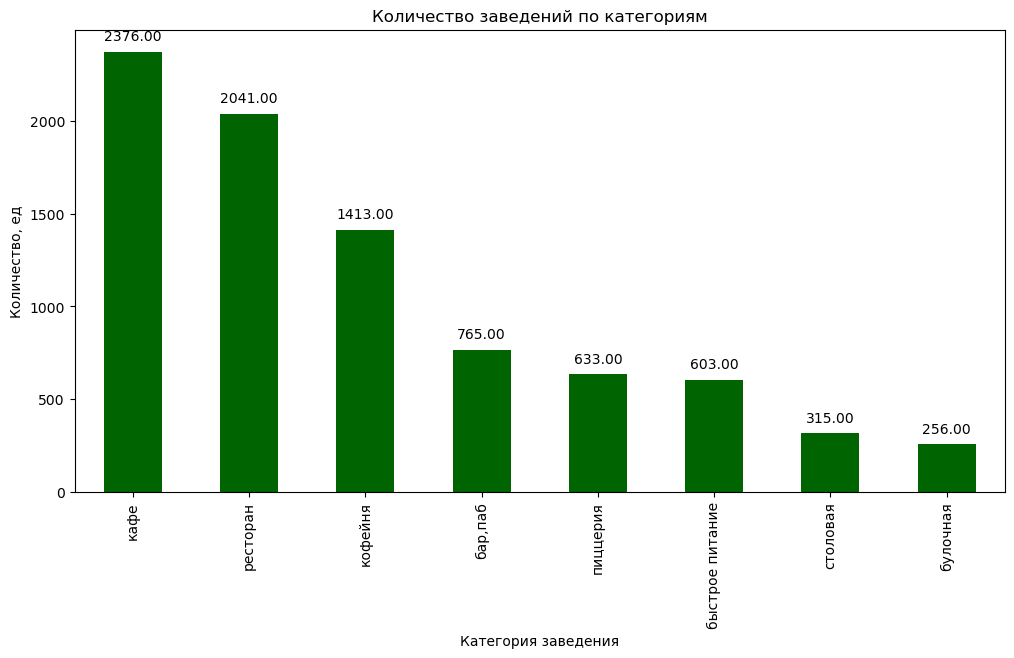

In [57]:
create_bar_chart(
    dataframe=rest_category,
    quantitative_column='amount_place',
    categorical_column='category',
    title="Количество заведений по категориям",
    xlabel="Категория заведения",
    ylabel="Количество, ед",
    colors= 'darkgreen'
)


В данных представленно `8` категорий заведений общественного питания  Москвы. При этом лидирующую позицию по количеству заведений занимают `кафе`, `рестораны` и `кофейни`. Это говорит нам о высокой популярности такого формата заведений у жителей и гостей столицы.

### Анализ пространственного распределения заведений по районам

Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [58]:
print("\nНаименования административных районов:\n")
print(rest['district'].unique())


Наименования административных районов:

['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


In [59]:
district_count = rest.groupby('district')['category'].agg('count').sort_values(ascending=False).reset_index(name = 'amount_place')
print('\nИнформация о категориях представленных заведений\n')
print(district_count)



Информация о категориях представленных заведений

                                  district  amount_place
0       Центральный административный округ          2242
1          Северный административный округ           898
2             Южный административный округ           892
3  Северо-Восточный административный округ           890
4          Западный административный округ           850
5         Восточный административный округ           798
6     Юго-Восточный административный округ           714
7      Юго-Западный административный округ           709
8   Северо-Западный административный округ           409


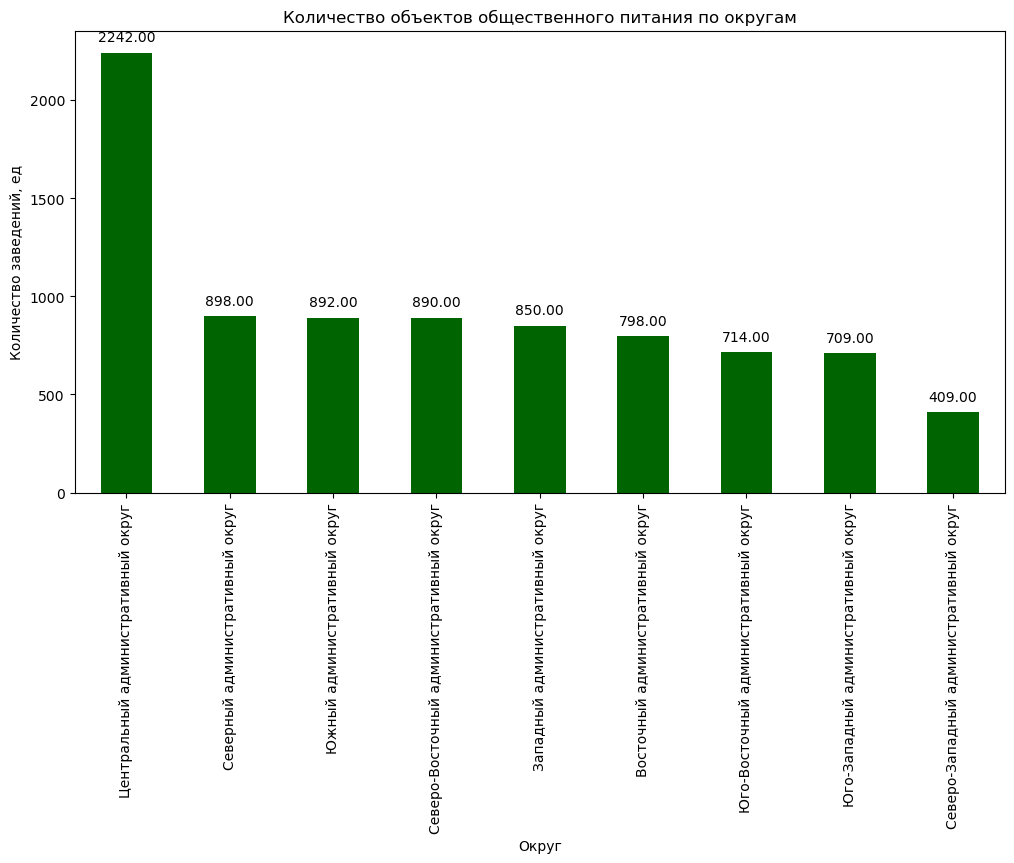

In [60]:
create_bar_chart(
    dataframe=district_count,
    quantitative_column='amount_place',
    categorical_column='district',
    title="Количество объектов общественного питания по округам",
    xlabel="Округ",
    ylabel="Количество заведений, ед",
    colors= 'darkgreen'
)

Самое большое количество заведений находится в `Центральном административном округе` в размере `2242 ед`, что обусловлено высокой концентрацией офисов, торговых центров и туристических объектов, высокая проходимость улиц и плотность населения, что создает идеальную среду для развития индустрии общественного питания. 

Все эти факторы делают `ЦАО` идеальным местом для размещения большого количества заведений общественного питания, что объясняет высокую концентрацию кафе, ресторанов и кофеен в этом районе.

In [61]:
# Оставляем только записи для Центрального административного округа
cao_rest = rest.loc[rest['district'] == 'Центральный административный округ']

# Оставляем только записи для других административных округов
other_rest = rest.loc[~(rest['district'] == 'Центральный административный округ')]

combined_df = pd.concat([
    cao_rest.assign(area='ЦАО'),
    other_rest.assign(area='Другие округа')
], ignore_index=True)

# Группируем объединённый датафрейм по категориям и рассчитываем количество заведений
grouped_data = combined_df.groupby(['category', 'area'])['id'].size().reset_index(name='amount')

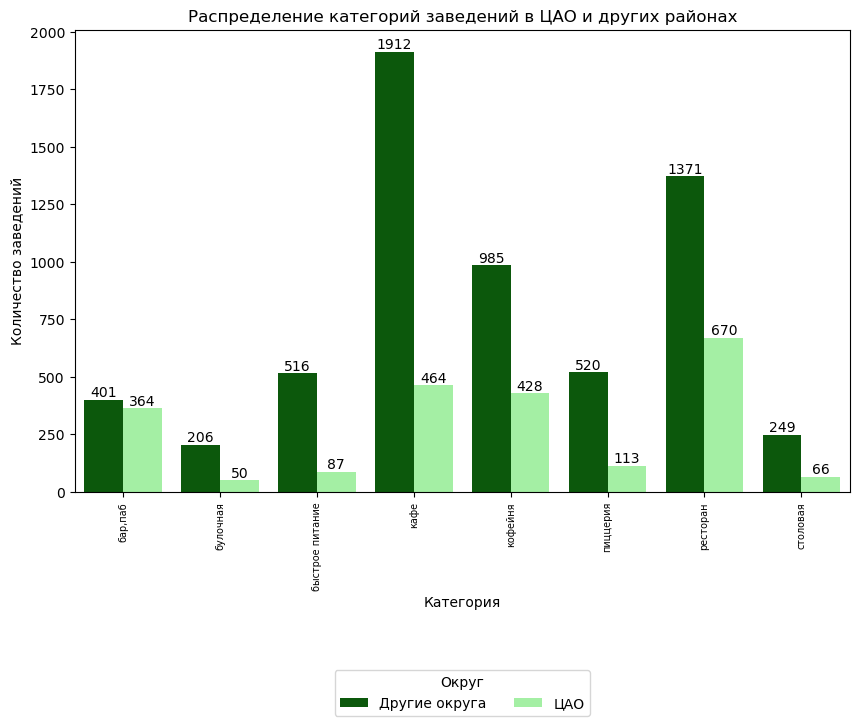

In [62]:
# Строим совмещенный график
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='category', y='amount', hue='area', data=grouped_data, palette=['darkgreen', 'palegreen'])

# Добавление подписей данных
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    value = int(height)
    ax.annotate(value, (x, y), ha='center', va='bottom')

plt.title('Распределение категорий заведений в ЦАО и других районах')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(fontsize=7, rotation=90)  # Наклон подписей по оси X на 45 градусов
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.5), title='Округ')
plt.show()


В `ЦАО` представлено больше всего ресторанов в размере `670 заведений`, а вот кафе и кофеен представлено практически одинаковое количество `464 и 428 заведений`, то есть данный формат достаточно популярен у посетителей или жителей данного округа.

Если сравнивать значение `ЦАО` в разрезе категории заведения и других районов, то мы можем видеть, что по таким категориям заведений как ресторан и кофейня приходится почти `50% `от данных других округов, а баров в центре сконцентрирована почти половина от всех действующих. а вот булочных, пиццерий и столовых достаточно мало.


### Оценка соотношения сетевых и несетевых заведений

Изучаем соотношение сетевых и несетевых заведений в разрезе всех данных и в зависимости от категории заведения. Определим каких заведений больше, какие категории заведений чаще всего бывают сетевыми.  

In [63]:
chain_count = rest['chain'].value_counts()
print("Общее количество сетевых и несетевых заведений:")
print(chain_count)

Общее количество сетевых и несетевых заведений:
0    5197
1    3205
Name: chain, dtype: int64


Больше всего представлено именно несетевых заведений, а именно их доля более `60%` и составляет `5201 заведения из 8406 возможных`.

In [64]:
# Доли сетевых и несетевых заведений
grouped_rest = rest.groupby(['category', 'chain'])['chain'].count()

# Преобразуем результат группировки в формат DataFrame
grouped_rest = grouped_rest.unstack(level='chain').fillna(0).astype(int)

# Добавляем новый столбец с общим числом заведений в каждой категории
grouped_rest['total'] = grouped_rest.sum(axis=1)

# Рассчитываем долю сетевых и несётевых заведений
grouped_rest['chain_share'] = round(100*grouped_rest[1] / grouped_rest['total'],2)
grouped_rest['non_chain_share'] = round(100*grouped_rest[0] / grouped_rest['total'],2)

In [65]:
grouped_rest_sort = grouped_rest.sort_values(by = 'non_chain_share', ascending=False)
grouped_rest_sort

chain,0,1,total,chain_share,non_chain_share
category,,,,,
"бар,паб",596,169,765,22.09,77.91
столовая,227,88,315,27.94,72.06
кафе,1597,779,2376,32.79,67.21
ресторан,1311,730,2041,35.77,64.23
быстрое питание,371,232,603,38.47,61.53
кофейня,693,720,1413,50.96,49.04
пиццерия,303,330,633,52.13,47.87
булочная,99,157,256,61.33,38.67


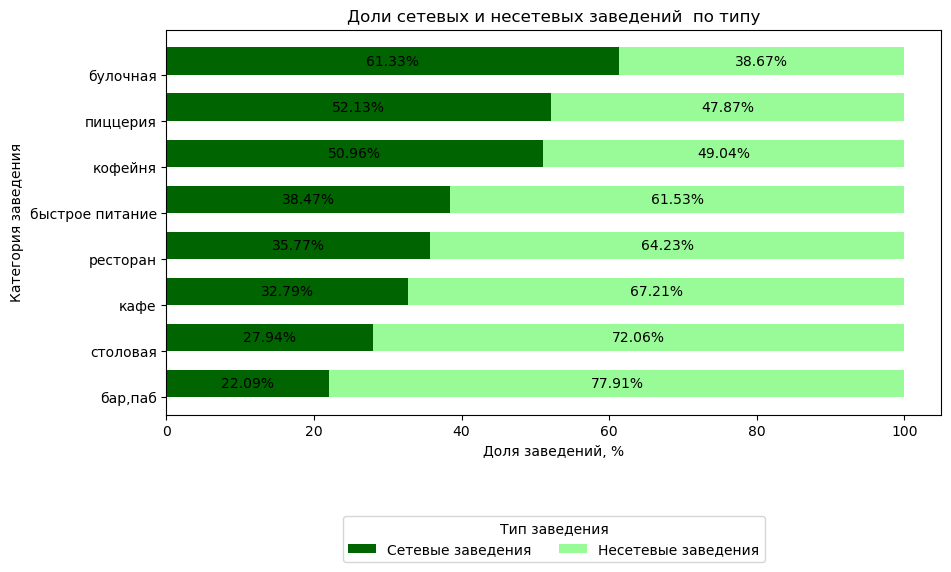

In [66]:
# Построение графика
categories = grouped_rest_sort.index
chain_shares = grouped_rest_sort['chain_share']
non_chain_shares = grouped_rest_sort['non_chain_share']

fig, ax = plt.subplots(figsize=(10, 5))

# Накопительный график
ax.barh(categories, chain_shares, align='edge', height=0.6, label='Сетевые заведения', color='darkgreen')
ax.barh(categories, non_chain_shares, left=chain_shares, align='edge', height=0.6, label='Несeтевые заведения', color='palegreen')

# Добавление подписей данных
for i, v in enumerate(chain_shares):
    mid_point = v / 2
    ax.text(mid_point, i+0.3, f"{v:.2f}%", ha="center", va="center")  # Подписи для сетевых заведений

for i, v in enumerate(non_chain_shares):
    start_point = chain_shares[i]  # Начало второго бара
    end_point = start_point + v  # Конец второго бара
    mid_point = (start_point + end_point) / 2  # Середина второго бара
    ax.text(mid_point, i + 0.3, f"{v:.2f}%", ha="center", va="center")  # Подписи для несeтевых заведений

# Настройки осей и заголовков
plt.xlabel('Доля заведений, %')
plt.ylabel('Категория заведения')
plt.title('Доли сетевых и несетевых заведений  по типу')
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.4), title='Тип заведения')
plt.show()

Представленный анализ показывает, как заведения общественного питания распределены по категориям в зависимости от принадлежности к сетевым структурам.

Среди сетевых заведений лидируют:
- Булочные;
- пиццерии;
- кофейни.

Такие заведения, как булочные, пиццерии и кофейни, традиционно подходят для франшиз и сетевого формата, так как стандартизация меню и процессов управления позволяет масштабировать бизнес и поддерживать стабильное качество продукции.

Большинство несетевых заведений составляют:
- Пабы и бары;
- столовая.

Такие заведения предпочитают независимый формат ведения бизнеса, предлагая уникальные концепции и персонализированный подход к клиентам. Это характерно для заведений, ориентированных на создание уникальной атмосферы и эксклюзивных предложений, что сложнее воспроизвести в рамках сети.й.

Таким образом, исследование демонстрирует различия в структуре заведений, обусловленные выбранным бизнесом-моделью и концепцией заведения.

### Изучение статистики посадочных мест, выявление возможных аномалий

Проведем исследование количества посадочных мест, в том числе выявим возможные аномальные значения. Определить для каждой категории заведений наиболее типичное для него количество посадочных мест.

Для начала выгрузим  для столбца `seats` данные по описательной статистике.

In [67]:
rest['seats'].describe(percentiles=[.3,.35,.4,.45,.5,.75,.90,.95,.99])

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
30%        45.000000
35%        49.000000
40%        54.000000
45%        60.000000
50%        75.000000
75%       140.000000
90%       240.000000
95%       307.000000
99%       625.000000
max      1288.000000
Name: seats, dtype: float64

Как видно из представленных данных наблюдается достаточно большой разброс между минимальным и максимальным значением в данных о количестве мест `от 0 до 1288 мест`, при этом медианное значение составляет `75 мест`, что более реалистично. При этом стоит отметить большой разброс данных между средним и медианным значением. Поэтому, стоит изучить данные на наличие выбросов.

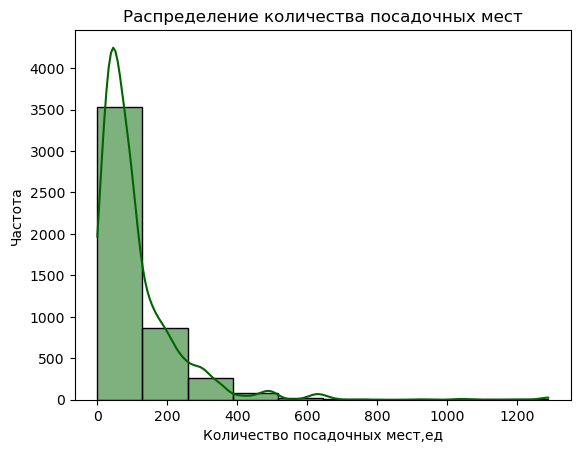

In [68]:
sns.histplot(data=rest, x='seats', kde=True, bins = 10, color = 'darkgreen')
plt.figsize=(15, 7)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест,ед')
plt.ylabel('Частота')
plt.show()

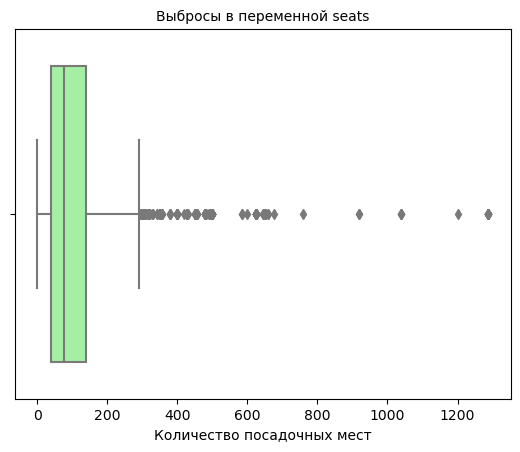

In [69]:
sns.boxplot(data=rest, x='seats', color = 'palegreen')
plt.title('Выбросы в переменной seats', fontsize=10)
plt.xlabel('Количество посадочных мест', fontsize=10)
plt.show()

Границы типичных значений: [-110.0, 290.0]


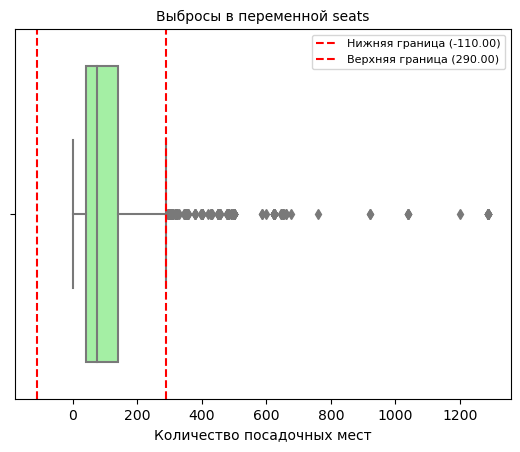

In [70]:
# Получаем квантили
Q1 = rest['seats'].quantile(0.25)
Q3 = rest['seats'].quantile(0.75)
IQR = Q3 - Q1

# Нижняя и верхняя границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Границы типичных значений: [{lower_bound}, {upper_bound}]')
sns.boxplot(data=rest, x='seats', color = 'palegreen')
plt.title('Выбросы в переменной seats', fontsize=10)
plt.xlabel('Количество посадочных мест', fontsize=10)
# Можно добавить линии на графике, отмечающие границы
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Нижняя граница ({lower_bound:.2f})')
plt.axvline(upper_bound, color='r', linestyle='--', label=f'Верхняя граница ({upper_bound:.2f})')
plt.legend(fontsize=8)
plt.show()

Наблюдается ненормативное распределение, так как у данных наблюдается "хвост данных" с правой стороны.
Также `boxplot()` показывает наличие аномальных значений `после 290 `, однако рестораны и с большим количество посадочных мест могут быть, но это скорее исключение. так как это обычно банкетные залы, поэтому стоит посмотреть данные выбросов.


In [71]:
rest[rest['seats'] > 700]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_beer_glass,is_24_7
2713,8d07e2d1810b4dca9d4cb247d0335df3,ваня и гоги,"бар,паб","москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"ежедневно, 11:00–06:00",4.2,0,1040.0,высокие,Средний счёт:1000–2500 ₽,1750.0,NaN,NaN,0
2722,4731af3e68bb449fb2b34493fadfaed1,маргарита,быстрое питание,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"ежедневно, 10:00–22:00",4.3,1,1040.0,неизвестно,неизвестно,NaN,NaN,NaN,0
2770,4c196f841b0046b3ab3a60d3ed52bfc5,шоколадница,кофейня,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...",4.1,1,1040.0,неизвестно,неизвестно,NaN,NaN,NaN,0
2966,6b611f2fc2084078952aaef40780f11c,матрешка,кафе,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,неизвестно,4.0,0,1040.0,неизвестно,неизвестно,NaN,NaN,NaN,0
4180,77141ea2e18e4f06867b6fef81f2aae4,eataly,"бар,паб","москва, киевская улица, 2",Западный административный округ,"ежедневно, 12:00–23:00",4.6,0,920.0,неизвестно,неизвестно,NaN,NaN,NaN,0
4231,30d6c2abb42748bb98c01b1ed366e253,рестобар argomento,столовая,"москва, кутузовский проспект, 41, стр. 1",Западный административный округ,"ежедневно, 12:00–23:00",4.2,0,1200.0,высокие,Средний счёт:2500–5000 ₽,3750.0,NaN,NaN,0
4245,1444de238c0f4de8a1de18ed0cb418f7,стейк & бургер,кафе,"москва, киевская улица, 2",Западный административный округ,"ежедневно, 09:00–21:00",4.2,1,920.0,неизвестно,неизвестно,NaN,NaN,NaN,0
5486,d355bd6aaadc4bacb006347f0662e196,дом,кафе,"москва, улица юности, 1",Восточный административный округ,неизвестно,4.9,0,760.0,неизвестно,неизвестно,NaN,NaN,NaN,0
6518,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"москва, проспект вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,NaN,1
6524,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,NaN,0


In [72]:
print(f'Количество аномалий в столбце seats - '
      f'{rest[rest.seats > 700].shape[0]}')

Количество аномалий в столбце seats - 19


Анализ данных о количестве посадочных мест выявил несколько аномалий, возникающих по разным причинам:

- Часть данных, очевидно, оказалась задвоенной или внесённой некорректно, возможно, общее количество мест по всей сети заведения оказалось учтено как количество мест отдельного филиала;
- Несколько записей показывают необычные значения для некоторых категорий заведений, таких как кофейни и сервисы доставки вроде «Яндекс.Лавка». Вероятно, здесь указаны не реальные посадочные места, а поток клиентов или площадь помещений;
- Есть аномалии даже среди несетевых заведений, где крупные заведения (например, рестораны с банкетными залами) обладают необычно большими площадями (до 2000 мест).

Учитывая вышеуказанное, прямые манипуляции с этими данными (например, удаление аномалий) нежелательны, так как они несут потенциально важную информацию.

Лучшим решением будет:

- Оставить данные без радикальных изменений;
- Использовать медианное значение для оценки среднего количества посадочных мест, так как медиана менее чувствительна к наличию сильных отклонений (аномалий).Такое взвешенное решение сохранит целостность данных и повысит надёжность дальнейших выводов.

In [73]:
group_rest = rest.groupby('category')['seats']
mean_seats = group_rest.mean().reset_index(name='Среднее значение')
median_seats = group_rest.median().reset_index(name='Медианное значение')

result = mean_seats.merge(median_seats, on='category')
print(result)

          category  Среднее значение  Медианное значение
0          бар,паб        124.532051                82.5
1         булочная         89.385135                50.0
2  быстрое питание         98.891117                65.0
3             кафе         97.365653                60.0
4          кофейня        111.199734                80.0
5         пиццерия         94.496487                55.0
6         ресторан        121.869874                86.0
7         столовая         99.750000                75.5


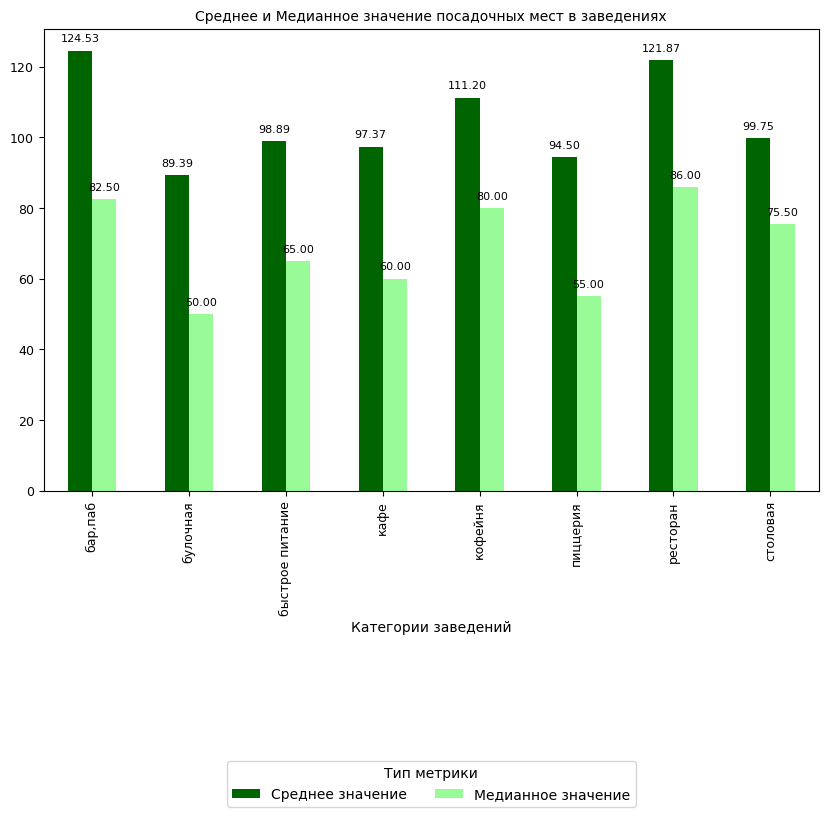

In [74]:
ax = result.plot(x = 'category', y = ['Среднее значение',  'Медианное значение'],kind='bar', color = ['darkgreen','palegreen'],figsize=(10, 6))
# Аннотирование высоты каждого бара
for p in ax.patches:
    height = p.get_height()
    text = f"{height:.2f}"  # Форматируем число с двумя знаками после запятой
    ax.annotate(text, xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Категории заведений', fontsize=10)
plt.title('Среднее и Медианное значение посадочных мест в заведениях',fontsize=10)
plt.tick_params(labelsize = 9)
plt.grid(False)
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.7), title='Тип метрики')
plt.show()

Рассмотрены данные о количестве посадочных мест в заведениях различного профиля. Было выявлено существенное отклонение между медианным и средним значением: `медианное значение примерно на 50-60% ниже среднего`. Такое сильное различие свидетельствует о ненормальном распределении данных с уклоном вправо, где значительную роль играют завышенные аномальные значения.

Причины такого явления могут включать:

- Наличие специализированных заведений с большим количеством посадочных мест (например, банкетные залы, крупные кафе и рестораны);
- Особенность отдельных заведений, связанных с массовыми мероприятиями или корпоративными услугами.

Получается, что такие «выбросы» вполне ожидаемы и обусловлены реальной спецификой заведений, а не техническими погрешностями.

Последствия для анализа:
- Во избежание искажений в будущем рекомендуется при сборе данных учитывать профиль заведения и его специализацию;
- Методология сбора данных должна предусматривать раздельное хранение информации о стандартных и нестандартных заведениях (например, с дополнительными помещениями или открытыми зонами отдыха).

Таким образом, разумно продолжать анализировать данные, используя медиану как более надежный показатель, учитывая реальную специфику объектов.

---
## Оценка рейтинговой заведения, его отклонение от среднего рейтинга по городу

Проведем исследование рейтингов заведений, а также определим уровень отклонения усредненного рейтинга от различных категорий заведений. 

In [75]:
## рассчитаем средний рейтинг в зависимости от категории заведения

avg_rating = rest.groupby('category')['rating'].mean().reset_index()
group_sort = avg_rating.sort_values(by = 'rating', ascending=False)
print(group_sort)

          category    rating
0          бар,паб  4.387712
5         пиццерия  4.301264
6         ресторан  4.290348
4          кофейня  4.277282
1         булочная  4.268359
7         столовая  4.211429
3             кафе  4.124285
2  быстрое питание  4.050249


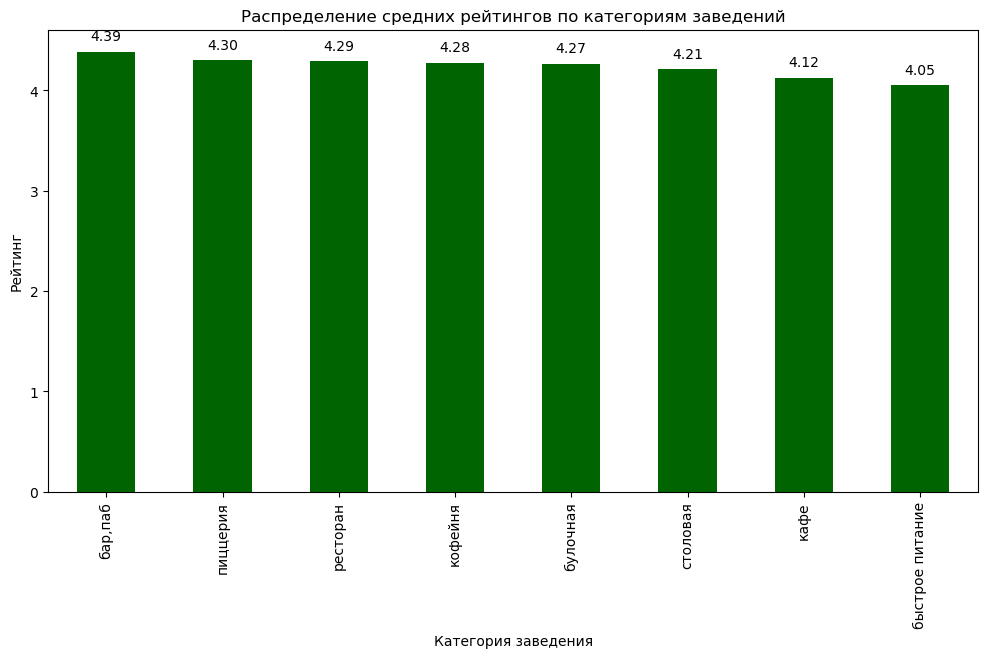

In [76]:
create_bar_chart(
    dataframe= group_sort,
    quantitative_column='rating',
    categorical_column='category',
    title="Распределение средних рейтингов по категориям заведений",
    xlabel="Категория заведения",
    ylabel="Рейтинг",
    colors= 'darkgreen'
)


График продемонстрировал существенные различия в рейтинге заведений разного типа:

- Бар и пиццерия получили самый высокий рейтинг — 4.39 и 4.30 соответственно;
- Рейтинг заведений быстрого питания оказался заметно ниже — 4.05.


Высокие рейтинги баров и пиццерий объясняются рядом факторов:

- Атмосферой заведения: комфортная обстановка, приятная компания друзей способствуют положительной оценке;
- Сервисом: высокое качество еды и напитков, доброжелательность персонала.
- Ассортиментом: широкий выбор напитков и закусок.

Заведения быстрого питания зачастую ориентированы на скорость обслуживания и низкую стоимость, что иногда снижает сервис и общее впечатление гостей.

Важно учитывать, что рейтинги подвержены множеству обстоятельств:

- Местоположение заведения;
- Конкуренция в данном регионе;
- Профиль целевой аудитории;
- Временные факторы (сезонность, праздники и т.д.).

Эти нюансы необходимо учитывать при принятии решений и разработке стратегии развития заведения.

---
### Оценка взаимосвязи рейтинга заведения и различных факторов 

In [77]:
# Указываем явный список количественных (интервальных) признаков
interval_cols = ['chain', 'is_24_7', 'rating', 'seats']

# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = phik_matrix(
    rest[['category', 'district', 'chain', 'price', 'avg_bill', 'is_24_7', 'rating','seats']],
    interval_cols=interval_cols
)

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.281253
district,0.200761
category,0.189677
is_24_7,0.150365
chain,0.108114
avg_bill,0.000000
seats,0.000000


Сильной связи между рейтингом и категориальными нет, то есть на рейтинг не всегда влияет место расположения, категория заведения, средний чек, период работы и так далее. Рейтинг чаще бывает субъективной оценкой посетителя, в том числе она может быть обусловлена наличием в меню того или иного блюда, сервисом, самим интерьером заведения и так далее. Если исходить из представленных данных, при этом наиболее ощутимая связь наблюдается между категорией цены и местом расположения

В рамках проводимого анализа стоит провести оценку двух наиболее сильно влияющих  показателей на  рейтинг - это `price` и `district`.

In [78]:
def histplot_chart(dataframe, x_col, hue_col, title, xlabel, ylabel, bins='', colors=None, alpha=0.75):

    fig, ax = plt.subplots(figsize=(15, 9))  # Увеличили размер графика для лучшей читаемости

    sns.histplot(
        data=dataframe,
        x=x_col,
        hue=hue_col,
        multiple="dodge",  # Размещаем гистограммы рядом друг с другом для лучшего сравнения
        stat="count",
        common_norm=False,  # Отключаем нормировку, чтобы сохранить абсолютные частоты
        alpha=alpha,        # Прозрачность для улучшения видимости перекрывающихся областей
        palette=colors,     # Применяем указанные цвета для каждой ценовой категории
        bins=bins,
        ax = ax 
    )

    plt.xlabel(xlabel, fontsize=10)  # Увеличенный шрифт для оси X
    plt.ylabel(ylabel, fontsize=10)  # Увеличенный шрифт для оси Y
    plt.title(title, fontsize=14)    # Увеличенный шрифт для заголовка
   # Перемещаем и настраиваем легенду
    # Перемещаем и настраиваем легенду

    
    
    plt.show()

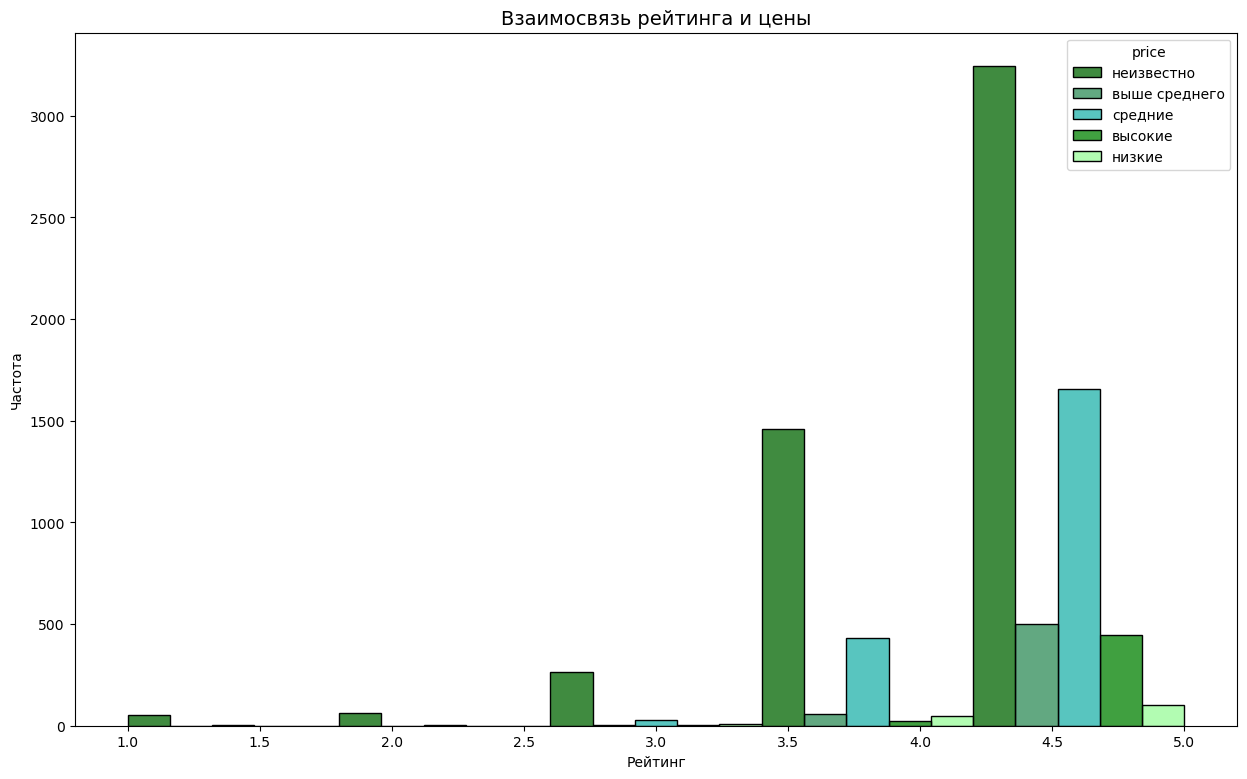

In [79]:
histplot_chart(
    dataframe=rest,
    x_col='rating',
    hue_col='price',
    title='Взаимосвязь рейтинга и цены',
    xlabel='Рейтинг',
    ylabel='Частота',
    colors=[ 'darkgreen', 'seagreen','lightseagreen','green', 'palegreen'], bins = 5
)

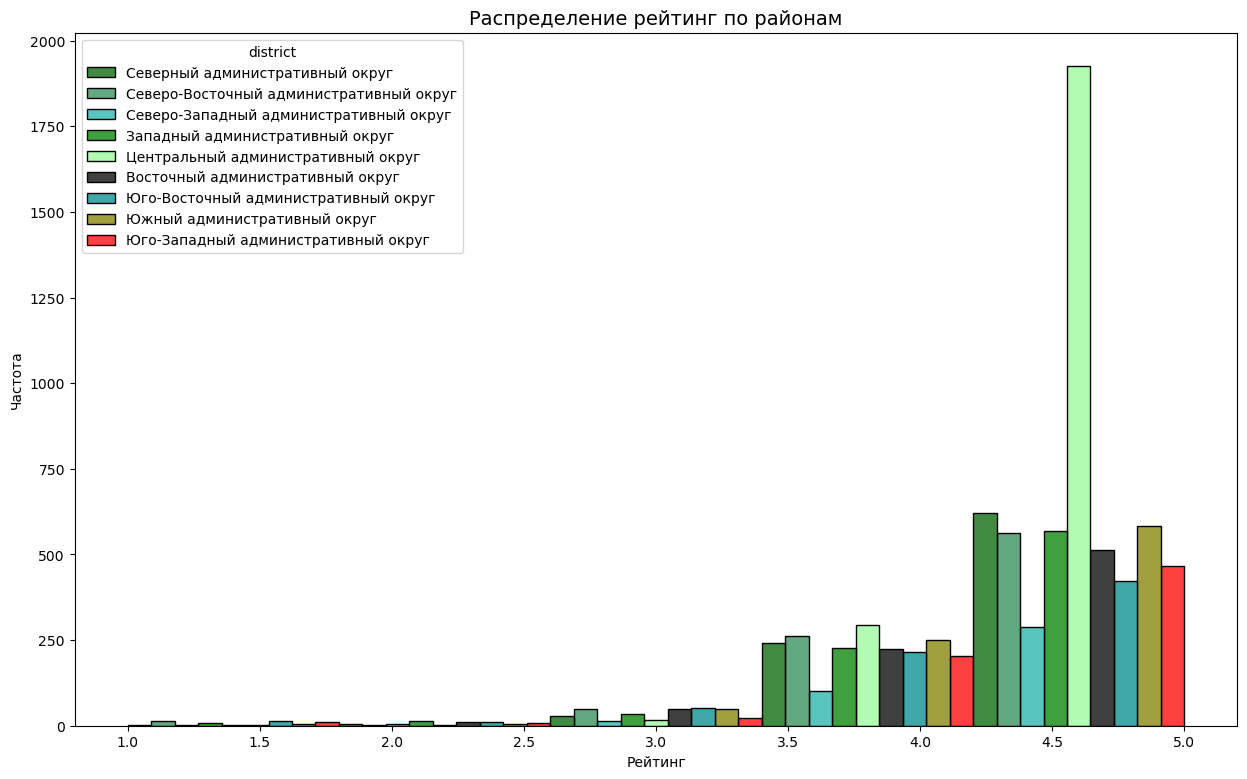

In [80]:
histplot_chart(
    dataframe=rest,
    x_col='rating',
    hue_col='district',
    title='Распределение рейтинг по районам',
    xlabel='Рейтинг',
    ylabel='Частота',
    colors=[ 'darkgreen', 'seagreen','lightseagreen','green', 'palegreen', 'black', 'darkcyan','olive','red'], bins = 5
)


Ранее мы установили сильную связь между двумя категориальными признаками: `price (ценовая категория)` и `district (административный округ)`. Исходя из нашего анализа, можно заключить:

- Основная масса заведений имеет рейтинг в пределах от 3 до 5 звезд, при этом подавляющее большинство располагается в диапазоне от 4.3 до 5.0;
- Высокие рейтинги чаще выставлялись заведениям со средней стоимостью услуг или чуть выше среднего уровня цен;
- Большая часть доступной информации относится к Центральному административному округу (ЦАО), где преобладают высокие рейтинги (чаще всего выше 4.5).

Таким образом, несмотря на невысокий коэффициент корреляции, анализ показывает определенную взаимосвязь между ценообразованием и расположением заведения.

**Основные выводы:**
- Заведения с умеренным уровнем цен, расположенные преимущественно в ЦАО, имеют хорошие перспективы для высоких оценок;
- Административное расположение заведения играет важную роль в восприятии клиентами: клиенты в ЦАО склонны давать более высокие оценки, что может указывать на повышенные ожидания от уровня сервиса и комфорта в центральных частях города.



---

### Определение топ-15 популярных сетей в Москве  с учетом количества заведений в регионе.

In [81]:
top_15_rest =rest.groupby('name').agg({'chain':'sum',
                                        'rating' : 'mean'}).rename(columns = {'chain': 'popularity',
                                                                              "rating": 'avg_rating'}).sort_values(by ='popularity', ascending=False).reset_index().head(15)

print(top_15_rest)

                                   name  popularity  avg_rating
0                           шоколадница         120    4.177500
1                        домино'с пицца          76    4.171429
2                            додо пицца          74    4.286486
3                      one price coffee          71    4.069444
4                          яндекс лавка          69    3.872464
5                                 cofix          65    4.075385
6                                 prime          50    4.116000
7                            хинкальная          44    4.322727
8                              кофепорт          42    4.147619
9   кулинарная лавка братьев караваевых          39    4.394872
10                              теремок          38    4.123684
11                              чайхана          37    3.924324
12                              буханка          32    4.396875
13                             cofefest          32    3.984375
14                                му-му 

In [82]:
categories = rest.groupby('name')['category'].apply(lambda x: ', '.join(set(x)))

# Присваиваем результат группировки обратно в датафрейм top_15_rest
top_15_rest['category'] = categories

# Сбрасываем индекс в датафрейм top_15_rest
top_15_rest.reset_index(drop =True, inplace=True)

In [83]:
top_15_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        15 non-null     object 
 1   popularity  15 non-null     int64  
 2   avg_rating  15 non-null     float64
 3   category    0 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 608.0+ bytes


In [84]:
top_15_rest.head(15)

,name,popularity,avg_rating,category
0,шоколадница,120,4.177500,NaN
1,домино'с пицца,76,4.171429,NaN
2,додо пицца,74,4.286486,NaN
3,one price coffee,71,4.069444,NaN
4,яндекс лавка,69,3.872464,NaN
5,cofix,65,4.075385,NaN
6,prime,50,4.116000,NaN
7,хинкальная,44,4.322727,NaN
8,кофепорт,42,4.147619,NaN
9,кулинарная лавка братьев караваевых,39,4.394872,NaN


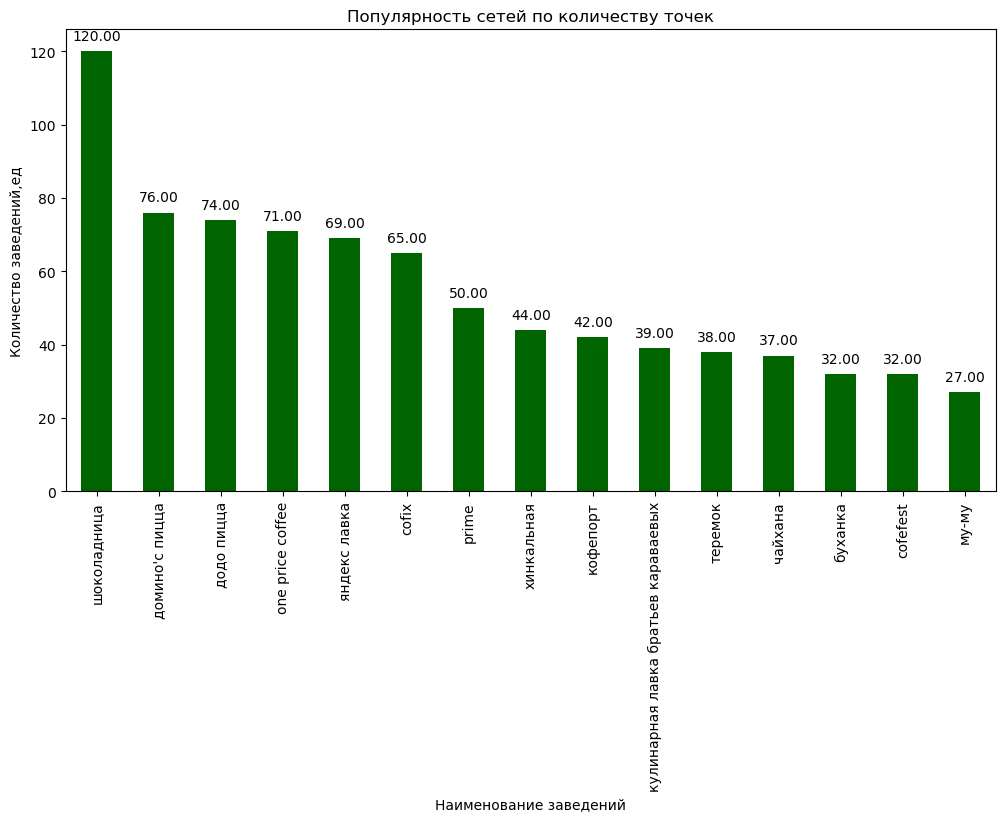

In [85]:
create_bar_chart(
    dataframe=top_15_rest,
    quantitative_column='popularity',
    categorical_column='name',
    title="Популярность сетей по количеству точек",
    xlabel="Наименование заведений",
    ylabel="Количество заведений,ед",
    colors= 'darkgreen'
)


Представленный `топ-15 заведений` отражает популярность заведений в Москве `по числу точек в сети`. Среди лидеров преобладают `кафе и кофейни`, а также `пиццерии`. Такая структура вполне объяснима, ведь подобные форматы бизнеса легче масштабируются: открытие новых точек требует меньше времени и ресурсов, они не нуждаются в больших площадях и легко адаптируются под спрос на еду навынос.

На вершине списка находится `Шоколадница` с 120 точками, следом идут две популярные пиццерии `Доминос` и `Додо`, которые являются в городе Москва одними из наиболее известных сетевых пиццерий. Таким образом, мы видим, что особую популярность имеют заведения, относящиеся к семейным кафе, предусматривающие наличие возможности взять кофе или еду на вынос и так далее.


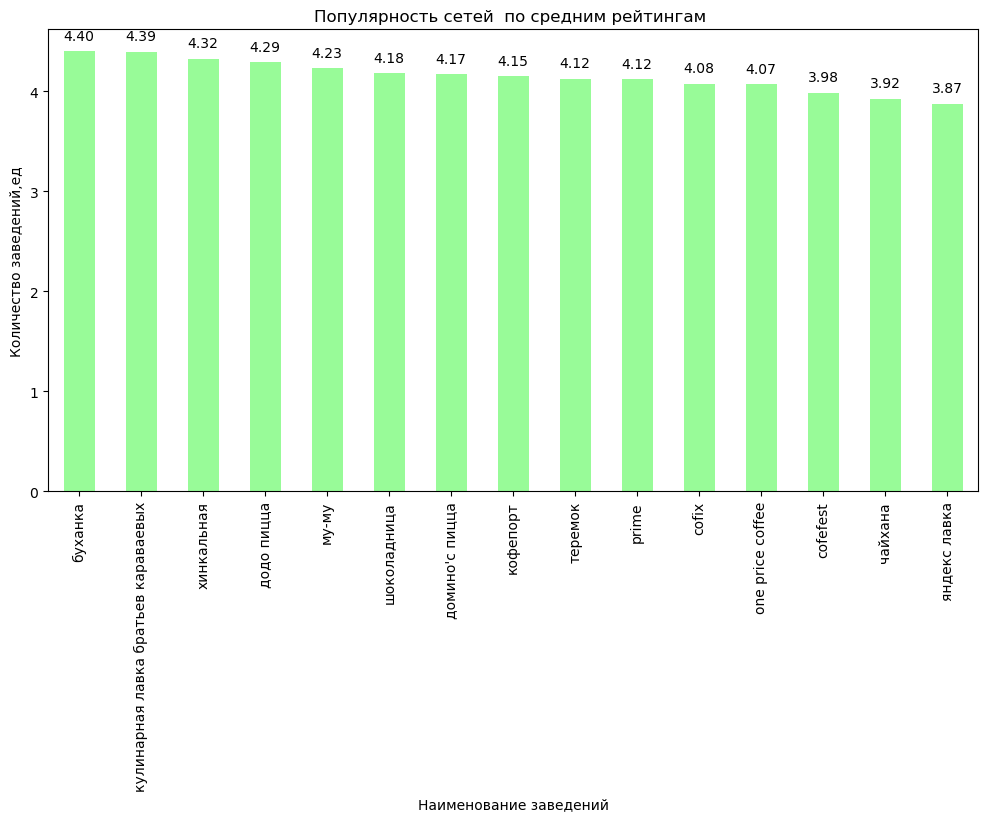

In [86]:
create_bar_chart(
    dataframe=top_15_rest.sort_values(by = 'avg_rating', ascending=False),
    quantitative_column='avg_rating',
    categorical_column='name',
    title="Популярность сетей  по средним рейтингам ",
    xlabel="Наименование заведений",
    ylabel="Количество заведений,ед",
    colors= 'palegreen'
)

При оценке топ-15 заведений в зависимости от рейтинга, то заведение `Шоколадница`, находится в середине списка со средним рейтингом `4.18`. Возможно, это связано с различными факторами, включая качество обслуживания, ассортимент блюд и напитков, атмосфера заведений и многие другие аспекты, влияющие на восприятие посетителей. 

Что касается высокого рейтинга у `Буханка` и `Лавка братьев Караваевых`, возможно, эти заведения уделяют особое внимание качеству своих услуг, что и отражается в высоких оценках клиентов.

### Исследование вариации среднего цека заведений в зависимости от месторасположения заведения

Проведём анализ цен в каждом районе, определим, как удаленность от центра влияет на цены в заведении.

In [87]:
## сделаем срез данных где будем учитывать только значения более 0
rest_bill = rest.loc[(rest['middle_avg_bill']>0)].copy()

In [88]:
##выгружаем данные статистики
rest_bill_stat = rest_bill.groupby('district')['middle_avg_bill'].describe()

In [89]:
rest_bill_stat

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Восточный административный округ,260.0,820.626923,850.903310,50.0,338.00,575.0,1100.0,10000.0
Западный административный округ,306.0,1053.225490,779.008536,50.0,427.50,1000.0,1500.0,5250.0
Северный административный округ,322.0,927.959627,912.609221,130.0,350.00,650.0,1250.0,11000.0
Северо-Восточный административный округ,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
Северо-Западный административный округ,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
Центральный административный округ,1059.0,1192.182247,919.720051,67.0,500.00,1000.0,1500.0,7250.0
Юго-Восточный административный округ,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0
Юго-Западный административный округ,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
Южный административный округ,314.0,834.398089,2008.640596,100.0,350.00,500.0,1037.5,35000.0


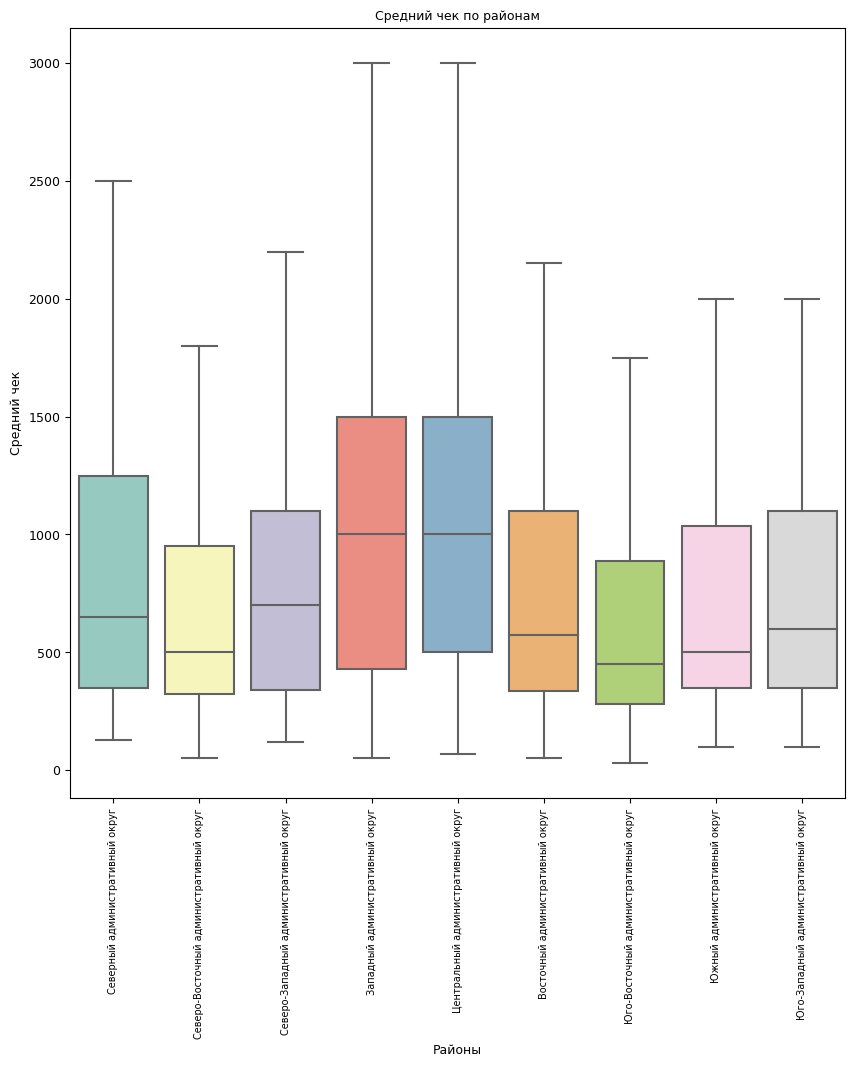

In [90]:
plt.figure(figsize=(10, 10))  # Размер графика
sns.boxplot(x='district', y='middle_avg_bill', data=rest_bill, palette='Set3', showfliers=False)  # Отключаем отображение выбросов

# Настройка оформления
plt.title('Средний чек по районам', fontsize=9)
plt.xlabel('Районы', fontsize=9)
plt.ylabel('Средний чек', fontsize=9)
plt.xticks(fontsize=7, rotation=90)  # Наклон подписей по оси X на 90 градусов
plt.yticks(fontsize=9)

# Отображаем график
plt.show()

Из анализа данных становится понятно, что величина среднего чека заведения существенно зависит от его территориального расположения:  Чем ближе заведение расположено к Центральному административному округу (ЦАО), тем выше средний чек.

Наиболее дорогие заведения сосредоточены в таких административных округах, как:
- Центральный административный округ (ЦАО);
- Западный административный округ (ЗАО);
- Северный административный округ (САО);
- Северо-Западный административный округ (СЗАО).

Высокий средний чек в этих районах объясняется близостью к центру столицы, престижностью районов и повышенной покупательской способностью местных жителей и туристов.

Какие практические выводы можно сделать:

- выбор локации заведения играет решающую роль в формировании среднего чека и прибыльности бизнеса;
- владельцам небольших заведений следует учитывать важность выбора оптимального района размещения;
- маркетинговая стратегия заведений должна адаптироваться к особенностям выбранного административного округа.

Таким образом, представленные данные подтверждают прямую зависимость среднего чека от близости заведения к центральным районам Москвы.

Следует обратить внимание на чеки свыше 5000 - 10000 рублей, так как все-таки даже для самых дорогих ресторанов обычно средний чек не превышает данную сумму.

In [91]:
## посмотрим аномалии в middle_avg_bill

rest[rest['middle_avg_bill']>10000]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_beer_glass,is_24_7
730,8ce8586978ff40d59375f65ef90757c2,чойхона,"бар,паб","москва, дмитровское шоссе, 95а",Северный административный округ,"ежедневно, 10:00–23:00",4.4,0,49.0,высокие,Средний счёт:5000–17000 ₽,11000.0,NaN,NaN,0
7177,07b4e95afe8b4d299f823dc4f9de6df5,кафе,ресторан,"москва, каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",4.1,0,100.0,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,NaN,1


Есть 2 значения превышающие установленное ограничение и это данные по ресторану Чойхона и Кафе, что говорит нам о высокой вероятности выбросов, однако если поискать данные о заведения в Москве, то это заведения с банкетными залами для фуршетов, где средний чек может столько составлять, что даже было указано на некоторых сайтах с информацией о цене среднего чека.  Однако для того чтобы все-таки сгладить данные для дальнейшего исследования лучше удалить данные о этих заведениях, к тому же как показывают данные заведения уже могу уже работать.

In [92]:
rest_bill = rest_bill[(rest_bill['middle_avg_bill'] < 10000)].copy()

In [93]:
rest_bill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145 entries, 1 to 8403
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3145 non-null   object 
 1   name               3145 non-null   object 
 2   category           3145 non-null   object 
 3   address            3145 non-null   object 
 4   district           3145 non-null   object 
 5   hours              3145 non-null   object 
 6   rating             3145 non-null   float64
 7   chain              3145 non-null   int64  
 8   seats              1987 non-null   float64
 9   price              3145 non-null   object 
 10  avg_bill           3145 non-null   object 
 11  middle_avg_bill    3145 non-null   float64
 12  middle_coffee_cup  0 non-null      float64
 13  middle_beer_glass  0 non-null      float64
 14  is_24_7            3145 non-null   int32  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 380.8+ KB


In [94]:
rest_bill_stat = rest_bill.groupby('district')['middle_avg_bill'].describe()
rest_bill_stat

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Восточный административный округ,259.0,785.185328,631.655930,50.0,337.00,550.0,1080.0,5500.0
Западный административный округ,306.0,1053.225490,779.008536,50.0,427.50,1000.0,1500.0,5250.0
Северный административный округ,321.0,896.582555,719.341313,130.0,350.00,650.0,1250.0,5000.0
Северо-Восточный административный округ,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
Северо-Западный административный округ,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
Центральный административный округ,1059.0,1192.182247,919.720051,67.0,500.00,1000.0,1500.0,7250.0
Юго-Восточный административный округ,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0
Юго-Западный административный округ,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
Южный административный округ,313.0,725.242812,542.500400,100.0,350.00,500.0,1000.0,3500.0


In [95]:
# Группируем данные по округу и вычисляем средние значения
grouped_by_district = rest_bill.groupby('district')['middle_avg_bill']
mean_bill = grouped_by_district.mean().reset_index(name='Среднее значение')
median_bill = grouped_by_district.median().reset_index(name='Медианное значение')

# Объединяем результаты
result_bill = mean_bill.merge(median_bill, on='district').sort_values(by = 'Среднее значение',ascending=False)

# Выводим результат
print(result_bill.head())

                                 district  Среднее значение  \
5      Центральный административный округ       1192.182247   
1         Западный административный округ       1053.225490   
2         Северный административный округ        896.582555   
4  Северо-Западный административный округ        822.222930   
7     Юго-Западный административный округ        792.561702   

   Медианное значение  
5              1000.0  
1              1000.0  
2               650.0  
4               700.0  
7               600.0  


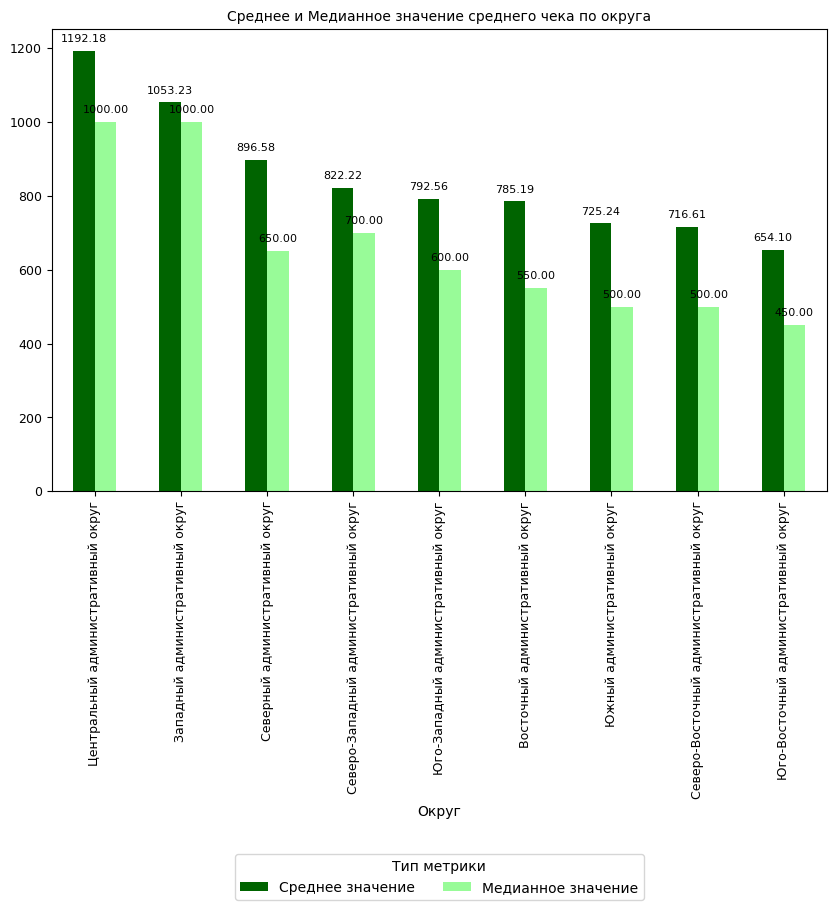

In [96]:
ax = result_bill.plot(x = 'district', y = ['Среднее значение',  'Медианное значение'],kind='bar', color = ['darkgreen','palegreen'],figsize=(10, 6))
# Аннотирование высоты каждого бара
for p in ax.patches:
    height = p.get_height()
    text = f"{height:.2f}"  # Форматируем число с двумя знаками после запятой
    ax.annotate(text, xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Округ', fontsize=10)
plt.title('Среднее и Медианное значение среднего чека по округа',fontsize=10)
plt.tick_params(labelsize = 9)
plt.grid(False)
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.9), title='Тип метрики')
plt.show()

Месторасположение заведения в значительной степени влияет на его экономические показатели, такие как средний чек:

- центральные районы характеризуются высокими расходами на аренду, обслуживающий персонал и инфраструктуру, что отражается на повышении цен на продукцию и услуги;
- субъективные факторы, такие как известность заведения, статус и привлекательность места, также повышают спрос и готовность клиентов платить больше.

Показатели свидетельствуют, что заведения, расположенные ближе к центру города (например, в ЦАО), демонстрируют стабильно высокие уровни доходов и активности потребителей. Даже в других популярных округах (ЗАО, САО, СЗАО) статистика остаётся позитивной, хотя и уступает показателям центра.


Выбор правильной локации заведения имеет важное значение для успешного функционирования бизнеса, так как именно расположение сказывается на востребованности и финансовых показателях ресторана или кафе.

Посмотрим как на средний чек еще повлияла категория заведения, так как здесь мы можем также найти зависимость.

In [97]:
##выгружаем данные статистикb на основании типа категории и среднего чека
rest_bill_stat_category = rest_bill.groupby('category')['middle_avg_bill'].describe()
rest_bill_stat_category

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",348.0,1311.000000,718.963479,150.0,918.75,1250.0,1750.0,5500.0
булочная,53.0,658.773585,599.468439,50.0,285.00,450.0,750.0,2500.0
быстрое питание,237.0,445.763713,456.092666,30.0,275.00,375.0,500.0,5500.0
кафе,694.0,707.753602,505.126951,67.0,350.00,550.0,1000.0,4500.0
кофейня,199.0,617.296482,500.437342,50.0,300.00,400.0,750.0,2500.0
пиццерия,395.0,789.377215,518.310744,150.0,424.00,600.0,1000.0,3000.0
ресторан,1038.0,1327.164740,917.536892,120.0,656.25,1250.0,1750.0,7250.0
столовая,181.0,335.348066,289.213253,125.0,250.00,300.0,330.0,3750.0


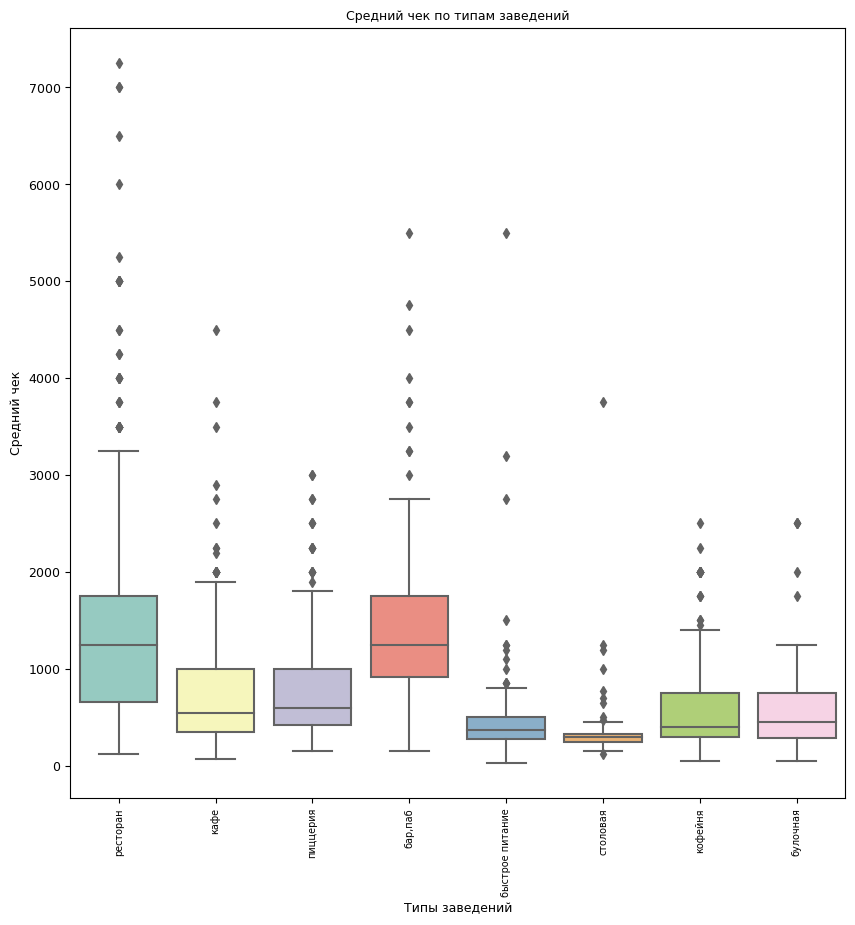

In [98]:
plt.figure(figsize=(10, 10))  # Размер графика
sns.boxplot(x='category', y='middle_avg_bill', data=rest_bill, palette='Set3')

# Настройки оформления
plt.title('Средний чек по типам заведений', fontsize=9)
plt.xlabel('Типы заведений', fontsize=9)
plt.ylabel('Средний чек', fontsize=9)
plt.xticks(fontsize=7, rotation=90)  # Наклон подписей по оси X на 45 градусов
plt.yticks(fontsize=9)

# Отображение графика
plt.show()

In [99]:
##построим данные для графика  илюстрирующего распределение среднего чека в зависимости категории 

grouped_by_category= rest_bill.groupby('category')['middle_avg_bill']
mean_bill_category = grouped_by_category.mean().reset_index(name='Среднее значение')
median_bill_category = grouped_by_category.median().reset_index(name='Медианное значение')


# Объединяем результаты
result_bill_category = mean_bill_category.merge(median_bill_category, on='category').sort_values(by = 'Среднее значение',ascending=False)

# Выводим результат
print(result_bill_category)


          category  Среднее значение  Медианное значение
6         ресторан       1327.164740              1250.0
0          бар,паб       1311.000000              1250.0
5         пиццерия        789.377215               600.0
3             кафе        707.753602               550.0
1         булочная        658.773585               450.0
4          кофейня        617.296482               400.0
2  быстрое питание        445.763713               375.0
7         столовая        335.348066               300.0


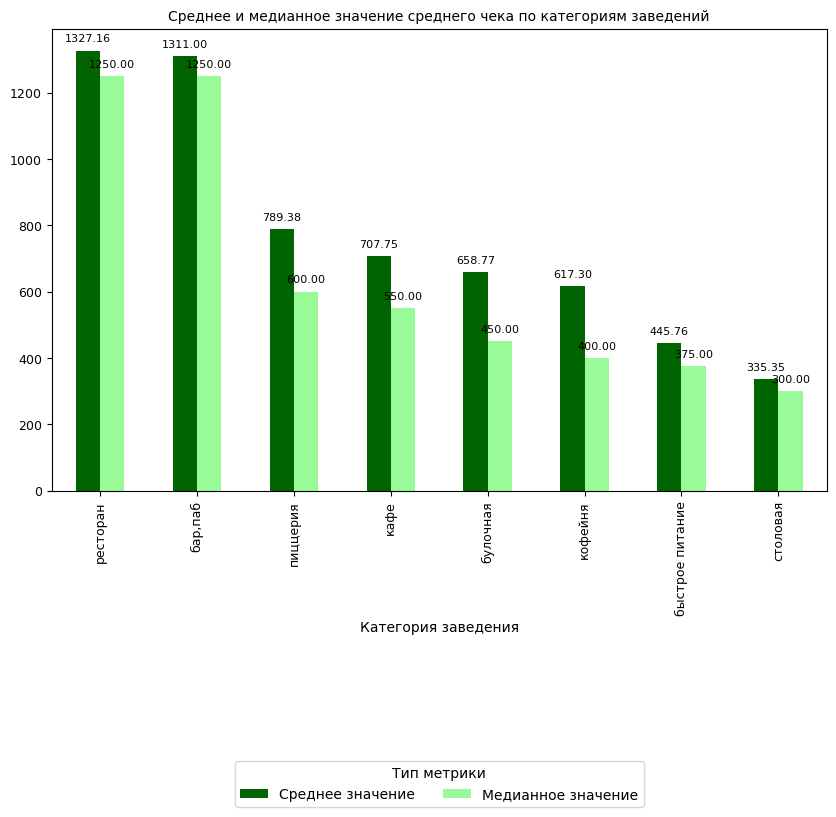

In [100]:
# Строим график
ax = result_bill_category.plot(x = 'category', y = ['Среднее значение',  'Медианное значение'],kind='bar', color = ['darkgreen','palegreen'],figsize=(10, 6))

# Аннотирование высоты каждого бара
for p in ax.patches:
    height = p.get_height()
    text = f"{height:.2f}"  # Форматируем число с двумя знаками после запятой
    ax.annotate(text, xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Категория заведения', fontsize=10)
plt.title('Среднее и медианное значение среднего чека по категориям заведений',fontsize=10)
plt.tick_params(labelsize = 9)
plt.grid(False)
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.7), title='Тип метрики')
plt.show()

Представленные данные убедительно иллюстрируют зависимость среднего чека от типа заведения:

- Чем выше класс заведения (рестораны премиум-класса, элитные кафе), тем выше средний чек, что естественно для дорогих заведений с премиальными услугами и ассортиментом;
- Вместе с тем, разброс данных также весьма значителен, что подчеркивает разнообразие ситуаций и индивидуальных особенностей заведений.

Интерпретация данных:
- Класс заведения: Средний чек возрастает пропорционально классу заведения. Дорогие рестораны и гастрономические клубы формируют высокий средний чек благодаря качеству блюд, обслуживанию и атмосфере;
- Разброс данных: Большой разброс значений среднего чека указывает на неоднородность рынков. Одни заведения работают в премиум-сегменте, другие — в эконом-классе, третьи представляют собой золотую середину. Это создаёт богатую палитру возможностей для удовлетворения потребностей разной аудитории.


Практические выводы:
- вид заведения и его сегментирование существенно влияют на величину среднего чека;
- заведения премиум-класса могут приносить высокие прибыли, но требуют серьёзных вложений в поддержание уровня сервиса.
- индивидуальный подход важен для каждой конкретной ситуации, так как разброс данных означает разнообразные условия ведения бизнеса.
Представленные данные важны для стратегического планирования и выработки грамотной ценовой политики.

Таким образом, категория заведения серьёзно влияет на уровень среднего чека, и каждое заведение должно ориентироваться на свою аудиторию и выбранную рыночную нишу.

In [101]:
# Указываем явный список количественных (интервальных) признаков
interval_cols = ['middle_avg_bill']

# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = phik_matrix(
    rest[['category', 'district','middle_avg_bill']],
    interval_cols=interval_cols
)

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной middle_avg_bill')
correlation_matrix.loc[correlation_matrix.index != 'middle_avg_bill'][['middle_avg_bill']].sort_values(by='middle_avg_bill', ascending=False)

Корреляционная матрица с коэффициентом phi_k для переменной middle_avg_bill


,middle_avg_bill
district,0.056558
category,0.053513


При этом формирование корреляционной матрицы с использованием `phi_k` показало, что связь есть между средним чеком районом и категорией, но  она не значительна, но строит помнить, что `phi_k` только показывает наличие связи, а не ее уровень мощи и так далее.

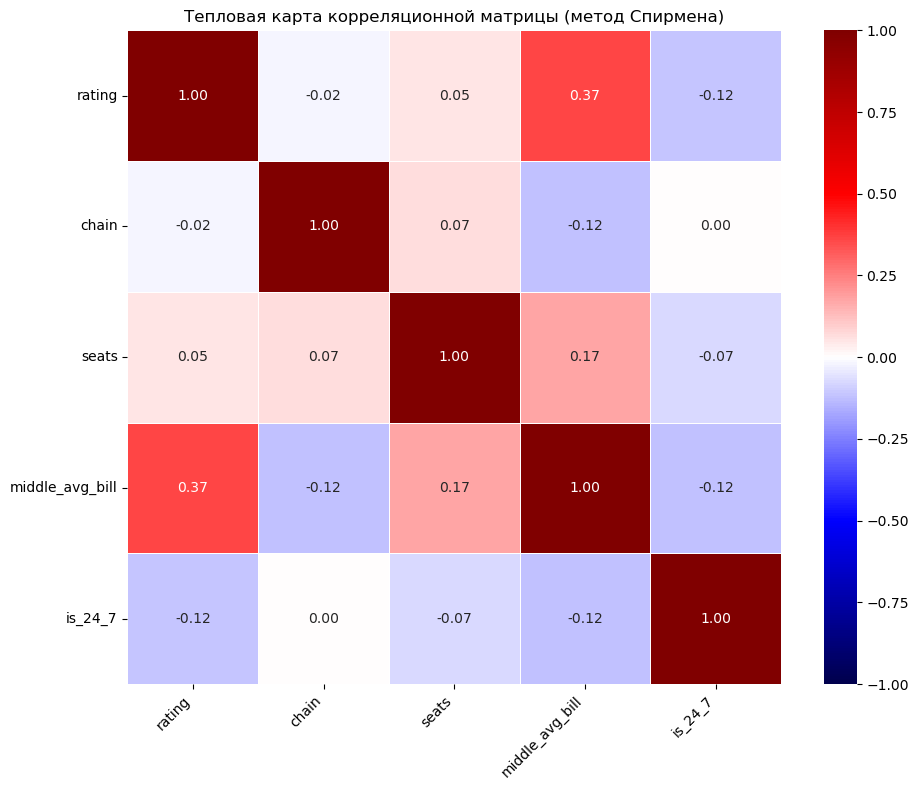

In [102]:
corr_matrix = rest_bill.drop(columns=['middle_coffee_cup','middle_beer_glass']).corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0, square=True, annot=True, fmt='.2f', linewidths=0.5, cmap='seismic'
)
plt.title('Тепловая карта корреляционной матрицы (метод Спирмена)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

В дополнение мы сформировали тепловую карту, для возможности оценки влияния и количественных показателей на средний чек. И на основании полученных данных можно сделать вывод о том, что на `middle_avg_bill` оказывает влияние рейтинг заведения, с остальными же показателями показывают низкий уровень корреляции.

---

### Исследование взаимосвязи данных по иным признакам


В датасете у нас есть также представлены данные средней стоимости одной чашки капучино, так как пока нет четкого понимания какой тип заведения стоит открыть оценка данной количественной переменной может показать уровень оценки и популярности кофе в заведении.  При этом стоит помнить, что в данном столбце было множество пропусков, наличие которых было объективно, поэтому при оценке данных стоит помнить, что значение -1 - это не выброс, а заглушка.

In [103]:
#Сформируем новый датасет  зависимости стоимости кофе и категории
rest_cup = rest.loc[(rest['middle_coffee_cup']>0)]

## выгрузим данные описательной статистики в зависимости от категории заведения
rest_cup_stat = rest_cup.groupby('category')['middle_coffee_cup'].describe()

In [104]:
rest_cup_stat

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",6.0,208.333333,35.308167,170.0,180.00,202.5,240.00,250.0
быстрое питание,1.0,140.000000,NaN,140.0,140.00,140.0,140.00,140.0
кафе,4.0,105.500000,21.393145,75.0,101.25,111.0,115.25,125.0
кофейня,521.0,175.055662,89.753009,60.0,124.00,170.0,225.00,1568.0
пиццерия,3.0,153.333333,5.773503,150.0,150.00,150.0,155.00,160.0


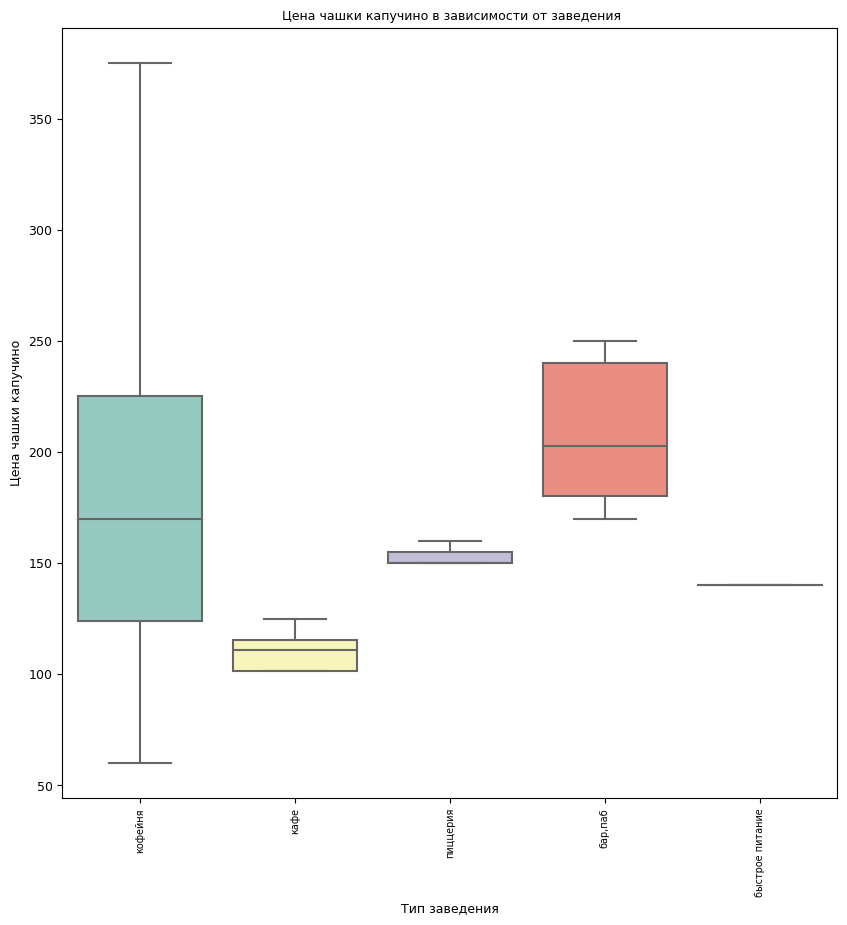

In [105]:
plt.figure(figsize=(10, 10))  # Размер графика
sns.boxplot(x='category', y='middle_coffee_cup', data=rest_cup, palette='Set3', showfliers=False)

# Настройки оформления
plt.title(' Цена чашки капучино в зависимости от заведения', fontsize=9)
plt.xlabel('Тип заведения', fontsize=9)
plt.ylabel('Цена чашки капучино', fontsize=9)
plt.xticks(fontsize=7, rotation=90)  # Наклон подписей по оси X на 45 градусов
plt.yticks(fontsize=9)

# Отображение графика
plt.show()

Анализ данных показал, что медианные и средние значения по различным категориям заведений различаются незначительно, что говорит о нормальной форме распределения данных. Медианное значение колеблется в узком диапазоне — `от 111 до 202.5 руб.`, что свидетельствует о однородности среднего чека в большинстве заведений.

Однако возникают сомнения в достоверности некоторых данных:

- выборка данных относительно невелика по сравнению с полным набором данных;
- доминирует категория «кофейня», что накладывает отпечаток на общность выводов.

В данных категории «кофейня» выделяется аномальное значение максимального чека — 1568 руб., что требует дополнительного анализа и проверки.

Пока же можно утверждать, что в целом данные выглядят нормально распределёнными, но существуют риски искажения из-за малого объёма выборки и присутствия сомнительного экстремума.

In [106]:
rest_cup[rest_cup['middle_coffee_cup'] > 700]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_beer_glass,is_24_7
2859,131f2d0c191e4f868d88a8da8ffece1f,шоколадница,кофейня,"москва, большая семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",4.2,1,48.0,средние,Цена чашки капучино:230–2907 ₽,NaN,1568.0,NaN,0


Проанализировав данные, мы обнаружили единственное явно аномальное значение — высокую цену чашки кофе в заведении `Шоколадница`. Хотя подобная цена возможна (так как в состав напитка могут входить дорогостоящие добавки), без дополнительных доказательств трудно однозначно утверждать, что это не ошибка.

Учитывая неопределённость происхождения данного значения, лучшим решением будет временно удалить его из выборки для продолжения анализа. Это позволит избежать риска искажения общей картины данных и повысить чистоту анализа.

In [107]:
rest_cup = rest_cup[rest_cup['middle_coffee_cup'] < 700]

In [108]:
rest_cup_category = rest_cup.groupby('category')['middle_coffee_cup']
mean_cup_category  = rest_cup_category.mean().reset_index(name='Среднее значение')
median_cup_category  = rest_cup_category.median().reset_index(name='Медианное значение')

result_cup = pd.merge(mean_cup_category, median_cup_category, on = 'category').sort_values(by = 'Среднее значение', ascending=False)

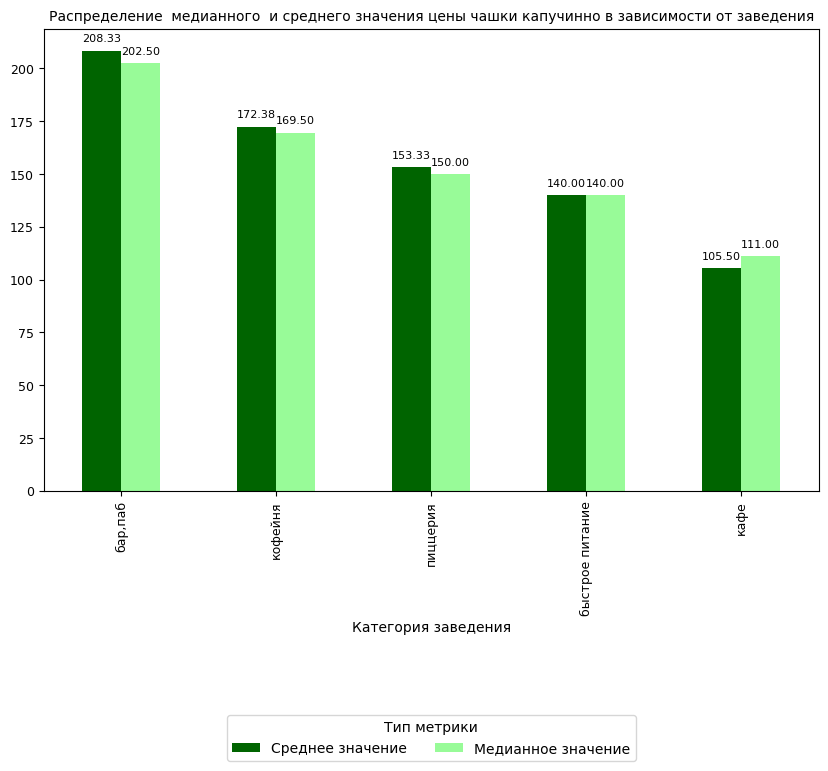

In [109]:
# Строим график
ax = result_cup.plot(x = 'category', y = ['Среднее значение',  'Медианное значение'],kind='bar', color = ['darkgreen','palegreen'],figsize=(10, 6))

# Аннотирование высоты каждого бара
for p in ax.patches:
    height = p.get_height()
    text = f"{height:.2f}"  # Форматируем число с двумя знаками после запятой
    ax.annotate(text, xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Категория заведения', fontsize=10)
plt.title('Распределение  медианного  и среднего значения цены чашки капучинно в зависимости от заведения',fontsize=10)
plt.tick_params(labelsize = 9)
plt.grid(False)
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.6), title='Тип метрики')
plt.show()

После удаления аномальных значений, данные по медиане и среднему значению практически сравнялись по всем категориям, что говорит нам об улучшении качества данных и приведению показателя к нормативному распределению.

In [110]:
rest_cup_district = rest_cup.groupby('district')['middle_coffee_cup']
mean_cup_district  = rest_cup_district.mean().reset_index(name='Среднее значение')
median_cup_district  = rest_cup_district.median().reset_index(name='Медианное значение')

result_cup_distinct = pd.merge(mean_cup_district, median_cup_district, on = 'district').sort_values(by = 'Среднее значение', ascending=False)

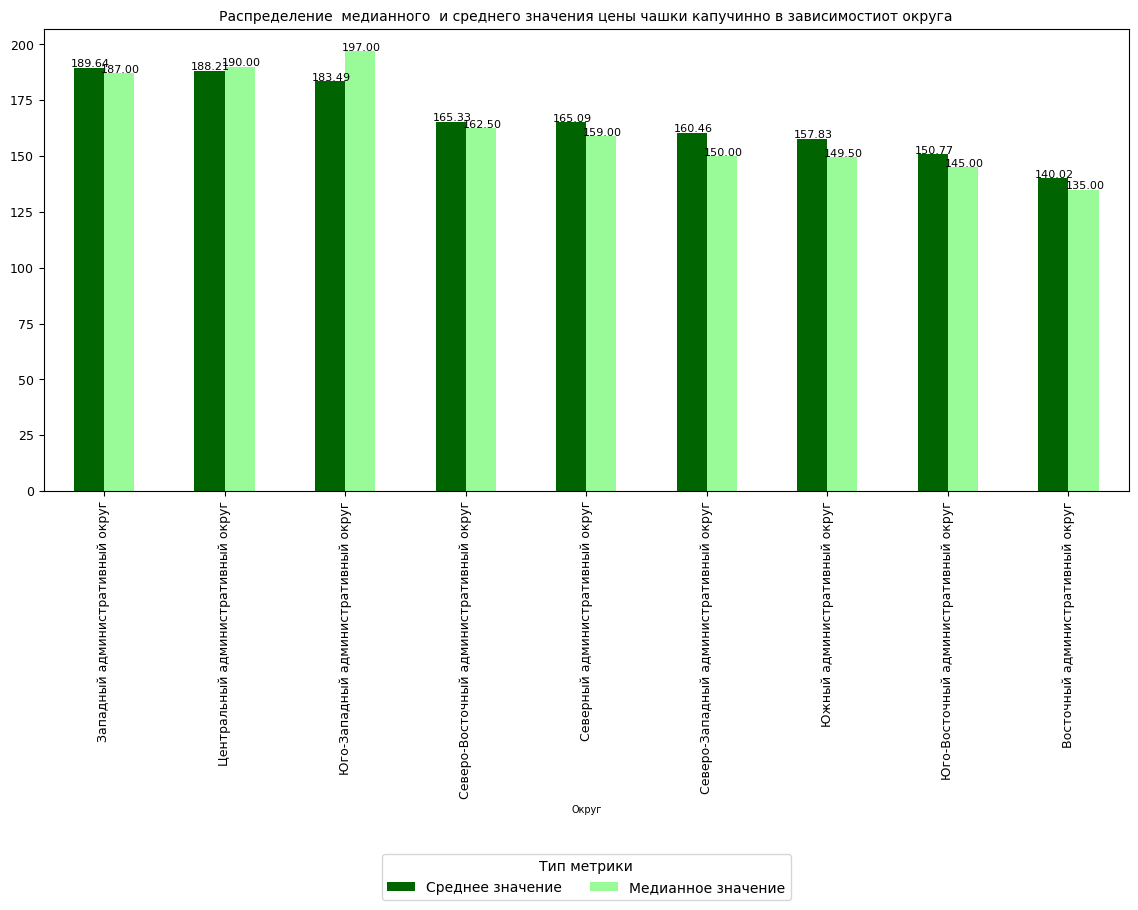

In [111]:
# Строим график
ax = result_cup_distinct.plot(x = 'district', y = ['Среднее значение',  'Медианное значение'],kind='bar', color = ['darkgreen','palegreen'],figsize=(14, 6))

# Аннотирование высоты каждого бара
for p in ax.patches:
    height = p.get_height()
    text = f"{height:.2f}"  # Форматируем число с двумя знаками после запятой
    ax.annotate(text, xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', xytext=(1, -1), textcoords='offset points', fontsize=8)

plt.xlabel('Округ', fontsize=7)
plt.title('Распределение  медианного  и среднего значения цены чашки капучинно в зависимостиот округа',fontsize=10)
plt.tick_params(labelsize = 9)
plt.grid(False)
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.9), title='Тип метрики')
plt.show()

Распределение средней цены чашки кофе в разрезе округов также практически сравнялись или имеют незначительные отличия. Поэтому можно говорить об улучшении данных. Но выборка данных все-равно достаточно небольшая для принято какие- либо решений  или разработки гипотезы.

In [112]:
# Вычисляем корреляционную матрицу с использованием phi_k
interval_cols = ['middle_coffee_cup']
correlation_matrix = phik_matrix(rest_cup[['category', 'district','middle_coffee_cup']],interval_cols=interval_cols)

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для  middle_coffee_cup ')
correlation_matrix.loc[correlation_matrix.index != 'middle_coffee_cup'][['middle_coffee_cup']].sort_values(by='middle_coffee_cup', ascending=False)

Корреляционная матрица с коэффициентом phi_k для  middle_coffee_cup 


,middle_coffee_cup
district,0.214088
category,0.000000


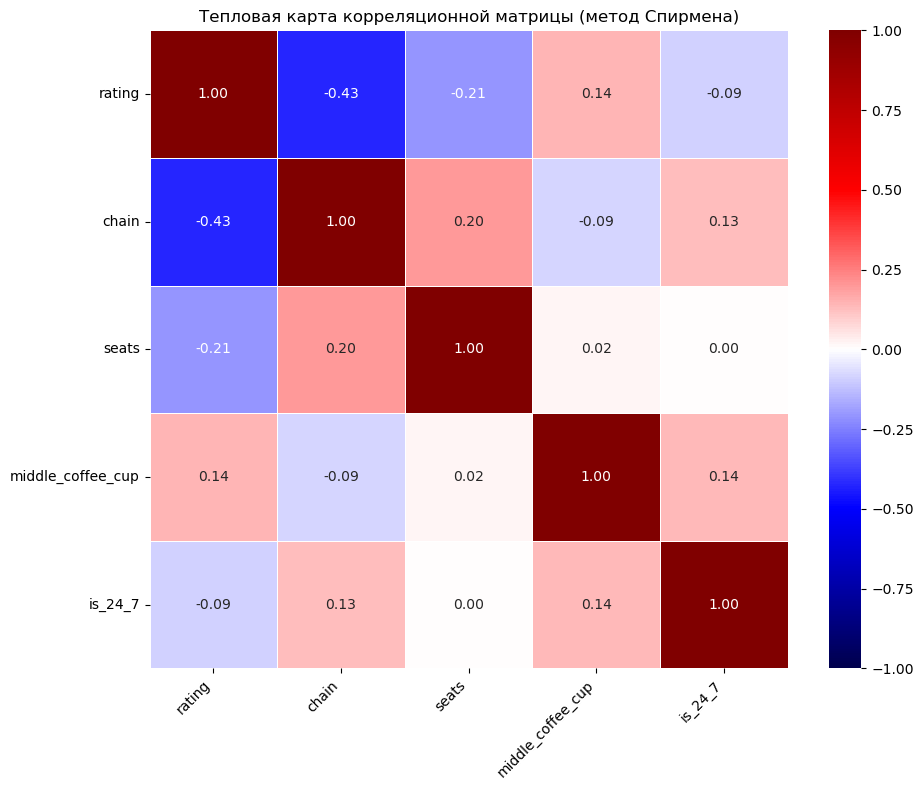

In [113]:
corr_matrix_cup = rest_cup.drop(columns=['middle_beer_glass','middle_avg_bill']).corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix_cup, 
    vmin=-1, vmax=1, center=0, square=True, annot=True, fmt='.2f', linewidths=0.5, cmap='seismic'
)
plt.title('Тепловая карта корреляционной матрицы (метод Спирмена)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

**Анализ данных показал интересный аспект:** на цену чашки кофе действительно влияет категория заведения, но это влияние носит косвенный характер. Для заведений, где кофе не является основным продуктом (например, бары и рестораны), значимость этой категории товаров снижена. В то же время для специализированных заведений, таких как кафе и кофейни, стоимость кофе играет принципиальную роль и требует особого внимания к ценовой политике.

Методика оценки корреляции с помощью коэффициента  `phi_k` дала отрицательные результаты, показав отсутствие сильной связи между показателем и рассматриваемым фактором. Однако это не отменяет важности учета влияния типа заведения на цену продукта.

Влияние категории заведения на цену кофе:
- в барах и ресторанах кофе выступает дополнением к основному предложению, поэтому его цена не критична;
- в кафе и кофейнях кофе является ключевым товаром, следовательно, необходимо уделять пристальное внимание формированию оптимальной цены.

Таким образом, хотя формально связи между показателями не выявлено, учет особенностей заведений остается важным моментом при анализе и принятии управленческих решений.


# Детальное исследование пиццерий

Пиццерии для нашей страны являются достаточно популярным местом досуга как с семей, так и с друзьями. Поэтому данному типу стоит уделить особое внимание.

In [114]:
## посчитем количество пиццерий  и ругих заведений
pizzeria_count = rest['category'].value_counts()['пиццерия']
print(f'Количество пиццерий: {pizzeria_count}')
print(f'Количество других заведений: {len(rest)-pizzeria_count}')

Количество пиццерий: 633
Количество других заведений: 7769


In [115]:
### Оценка количества пиццерий в каждом районе
pizzerias = rest[rest['category']=='пиццерия']
other_place = rest[rest['category']!='пиццерия']

# Группируем данные по категории и району, считая количество пиццерий
pizzerias_group = pizzerias.groupby(['district']).size().sort_values(ascending=False).to_frame(name='count_pizzerias')
other_place_group = other_place.groupby(['district']).size().sort_values(ascending=False).to_frame(name='count_other')

pizz_other_merge = pd.merge(pizzerias_group,other_place_group, on = 'district', how = 'outer')

pizz_other_merge["share_pizzerias"] = round(100*pizz_other_merge['count_pizzerias'] /(pizz_other_merge['count_pizzerias']+ pizz_other_merge ['count_other']),2)
pizz_other_merge["share_other_place"] = 100 - pizz_other_merge["share_pizzerias"]
pizz_other_merge.reset_index(inplace=True)
print(pizz_other_merge)

                                  district  count_pizzerias  count_other  \
0       Центральный административный округ              113         2129   
1          Северный административный округ               77          821   
2             Южный административный округ               73          819   
3         Восточный административный округ               72          726   
4          Западный административный округ               71          779   
5  Северо-Восточный административный округ               68          822   
6      Юго-Западный административный округ               64          645   
7     Юго-Восточный административный округ               55          659   
8   Северо-Западный административный округ               40          369   

   share_pizzerias  share_other_place  
0             5.04              94.96  
1             8.57              91.43  
2             8.18              91.82  
3             9.02              90.98  
4             8.35              91.65  

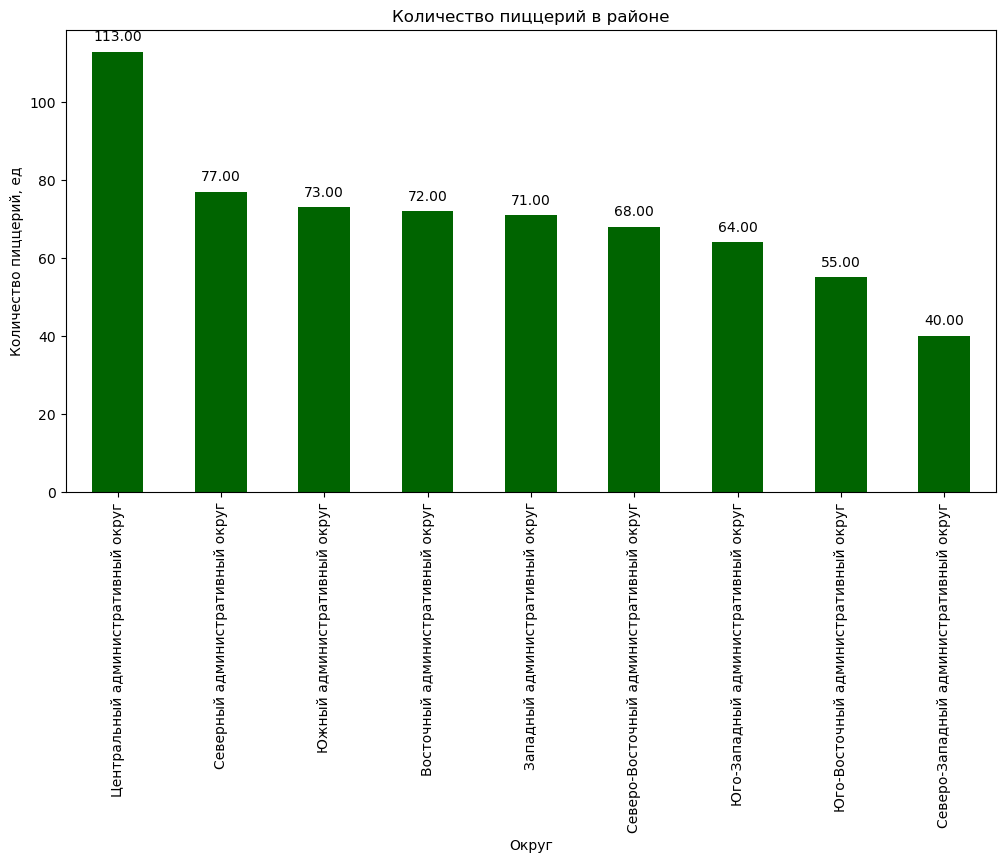

In [116]:
create_bar_chart(
    dataframe= pizz_other_merge.sort_values(by='count_pizzerias', ascending=False),
    quantitative_column= ['count_pizzerias'],
    categorical_column='district',
    title="Количество пиццерий в районе",
    xlabel="Округ",
    ylabel="Количество пиццерий, ед",
    colors= ['darkgreen','palegreen'])

Анализ данных показал, что пиццерии в Москве концентрируются главным образом в трёх административных округах:

- ЦАО (Центральный административный округ) — привлекает большое количество туристов, офисных сотрудников и студентов. Высокая плотность населения и оживленность делают этот район привлекательным местом для открытия пиццерий;
- САО (Северный административный округ) — характеризуется плотной жилой застройкой, что способствует созданию удобной инфраструктуры для проживания и потребления пищи;
- ЮАО (Южный административный округ) — наряду с САО обладает обширной территорией, частью которой является Новая Москва. Новый участок городской застройки создал благоприятные условия для развития сектора пиццерий;

Факторы, влияющие на размещение пиццерий:

- Плотность населения и жилые зоны привлекают владельцев пиццерий;
- Туристы и офисные работники увеличивают потребность в быстром питании;
- Популярность пиццы среди москвичей превращает её в обычное блюдо, а не только фастфуд;

Таким образом, пиццерии активно развиваются в этих округах, адаптируясь к потребностям разнообразной аудитории и реагируя на демографические и туристические потоки.

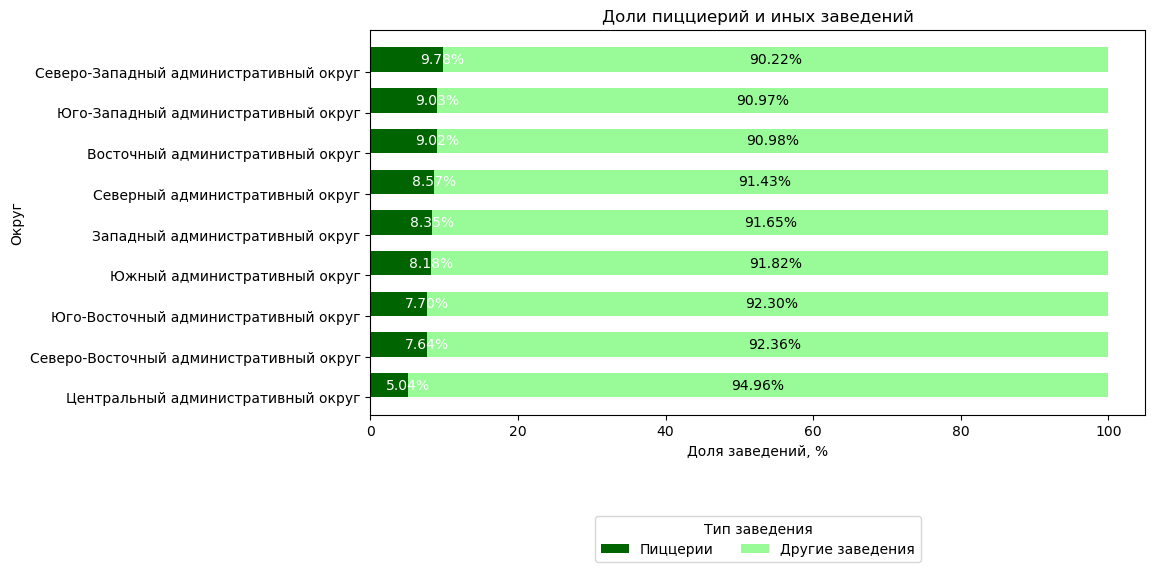

In [117]:
# Построение графика
sorted_data_district = pizz_other_merge.sort_values(by='share_pizzerias')

district = sorted_data_district['district']
pizza_shares = sorted_data_district['share_pizzerias']
other_shares = sorted_data_district['share_other_place']

fig, ax = plt.subplots(figsize=(10, 5))

# Накопительный график
ax.barh(district, pizza_shares, align='edge', height=0.6, label='Пиццерии', color='darkgreen')
ax.barh(district, other_shares, left=pizza_shares, align='edge', height=0.6, label='Другие заведения', color='palegreen')

# Добавление подписей данных
for i, v in enumerate(pizza_shares):
    mid_point = v 
    ax.text(mid_point, i+0.3, f"{v:.2f}%", ha="center", va="center",color = 'white')  # Подписи для пиццерий

for i, v in enumerate(other_shares):
    start_point = pizza_shares[i]  # Начало второго бара
    end_point = start_point + v  # Конец второго бара
    mid_point = (start_point + end_point) / 2  # Середина второго бара
    ax.text(mid_point, i+0.3, f"{v:.2f}%", ha="center", va="center")  # Подписи для других заведений

# Настройки осей и заголовков
plt.xlabel('Доля заведений, %')
plt.ylabel('Округ')
plt.title('Доли пицциерий и иных заведений')
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.4), title='Тип заведения')
plt.show()

Анализ данных выявил следующие ключевые аспекты распределения пиццерий в Москве:

- Общая доля пиццерий среди всех заведений общественного питания составляет не более 10%;
- Наибольшая относительная доля пиццерий зафиксирована в СЗАО и ЮЗАО, что объясняется следующими факторами:
    - Высокая плотность жилых зон в этих округах, создающая постоянный спрос на продукты для семейного досуга и встреч с друзьями;
    - Наличие многочисленных учебных учреждений в ЮЗАО, включая МГУ имени М.В. Ломоносова, стимулирует потребление недорогих и вкусных блюд, таких как пицца;

Таким образом, пиццерии становятся популярным выбором в данных округах, но при этом повышается уровень конкуренции, что важно учитывать при планировании открытия новых заведений.

## Исследование типовой пиццерии

Проводимое исследование позволит выявить основные характеристики пиццерии в городе Москва, что в дальнейшем позволит определить возможность и целесообразность открытия такого типа заведения в московском регионе.

In [118]:
# Среднее количество посадочных мест
avg_seats = pizzerias['seats'].mean()
print(f"Среднее количество посадочных мест: {avg_seats:.2f}")

Среднее количество посадочных мест: 94.50


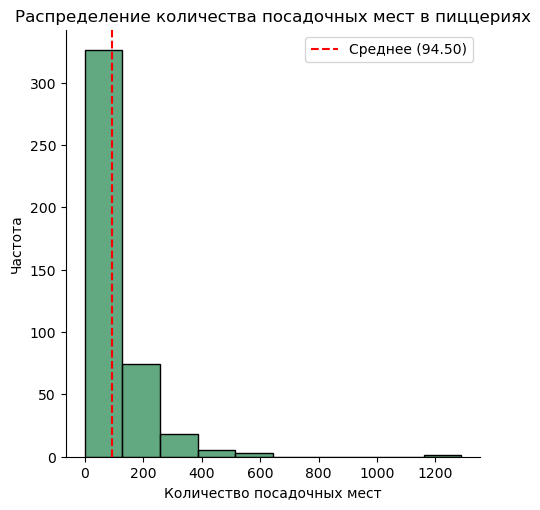

In [119]:
# Визуализация среднего количества посадочных мест
sns.displot(pizzerias['seats'], kde=False, bins=10,color='seagreen')
plt.axvline(avg_seats, color='r', linestyle='--', label=f'Среднее ({avg_seats:.2f})')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.title('Распределение количества посадочных мест в пиццериях')
plt.legend()
plt.show()

In [120]:
# Средний чек
avg_bill = pizzerias['middle_avg_bill'].mean()
print(f"Средний чек: {avg_bill:.2f}")

Средний чек: 789.38


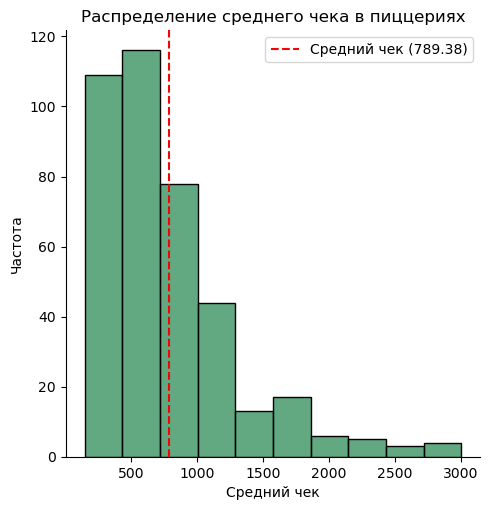

In [121]:
# Визуализация среднего чека
sns.displot(pizzerias['middle_avg_bill'], kde=False, bins=10,color='seagreen')
plt.axvline(avg_bill, color='r', linestyle='--', label=f'Средний чек ({avg_bill:.2f})')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.title('Распределение среднего чека в пиццериях')
plt.legend()
plt.show()

In [122]:
# Средний рейтинг
avg_rating = pizzerias['rating'].mean()
print(f"Средний рейтинг: {avg_rating:.2f}")

Средний рейтинг: 4.30


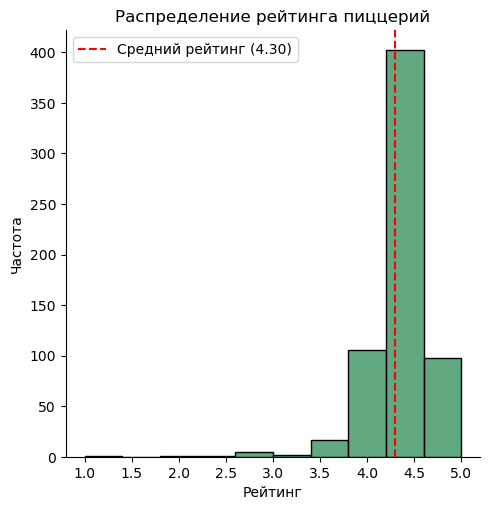

In [123]:

# Визуализация среднего рейтинга
sns.displot(pizzerias['rating'], kde=False, bins=10, color='seagreen')
plt.axvline(avg_rating, color='r', linestyle='--', label=f'Средний рейтинг ({avg_rating:.2f})')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.title('Распределение рейтинга пиццерий')
plt.legend()
plt.show()

In [124]:
# Доля сетевых заведений
chain_share = (pizzerias['chain'] == 1).sum() / len(pizzerias) * 100
not_chain_share = 100-chain_share
print(f"Доля сетевых заведений: {chain_share:.2f}%")


Доля сетевых заведений: 52.13%


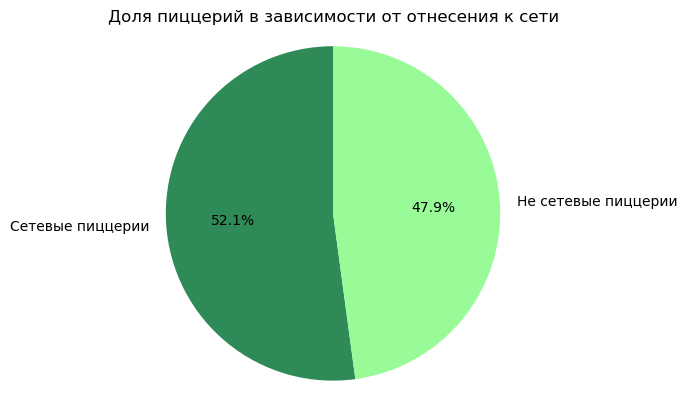

In [125]:
# Создание круговой диаграммы
labels = ['Сетевые пиццерии', 'Не сетевые пиццерии']
sizes = [chain_share, not_chain_share]
explode = (0, 0)  # Разделять секторы не будем

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', startangle=90, colors = ['seagreen','palegreen'])
ax.axis('equal')  # Делаем круг ровным
plt.title('Доля пиццерий в зависимости от отнесения к сети')

plt.show()

In [126]:
# Доля круглосуточных заведений
round_the_clock_share = (pizzerias['is_24_7'] == True).sum() / len(pizzerias) * 100
round_other = 100-round_the_clock_share
print(f"Доля круглосуточных пиццерии: {round_the_clock_share:.2f}%")

Доля круглосуточных пиццерии: 4.90%


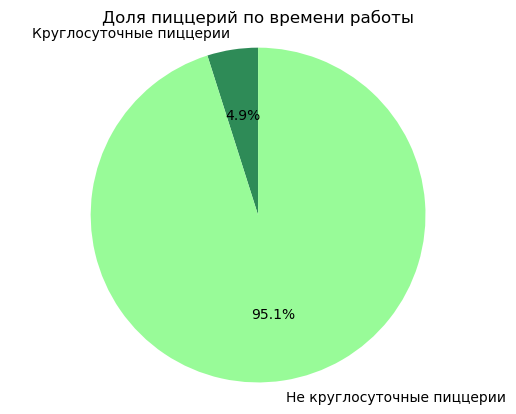

In [127]:
# Создание круговой диаграммы
labels = ['Круглосуточные пиццерии', 'Не круглосуточные пиццерии']
sizes = [round_the_clock_share, round_other]
explode = (0, 0)  # Разделять секторы не будем

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', startangle=90, colors = ['seagreen','palegreen'])
ax.axis('equal')  # Делаем круг ровным
plt.title('Доля пиццерий по времени работы')

plt.show()

Выгрузка показателей характеризующих непосредственно типовую пиццерию для Москвы - это чаще всего:
- Пиццерия с количество посадочных мест в диапазоне 100 мест, при этом среднее число мест - 94 места;
- средний чек пиццерии не превышает 800 рублей, то есть чек с среднем на поход в пиццерию составит от 500 до 1000 рублей;
- Средний рейтинг у пиццерий варьируется в диапазоне 4.3, что является достаточно высоким показателем для данного типа заведений. Это свидетельствует о высокой клиентоориентировоности, качественных продуктах и так далее;
- в основном представленные сетевые пиццерии с некруглосуточным режимом работы.


In [128]:
### Оценка количества пиццерий в каждом районе
pizzerias_chain = pizzerias[pizzerias['chain']==1]
pizzerias_not_chain = pizzerias[pizzerias['chain']==0]

# Группируем данные по категории и району, считая количество пиццерий
pizzerias_chain = pizzerias_chain.groupby(['district']).size().sort_values(ascending=False).to_frame(name='count_pizzerias_chain')
pizzerias_not_chain = pizzerias_not_chain.groupby(['district']).size().sort_values(ascending=False).to_frame(name='count_pizzerias_not_chain')

pizzerias_merge_network = pd.merge(pizzerias_chain,pizzerias_not_chain, on = 'district', how = 'outer')

pizzerias_merge_network["share_chain"] = round(100*pizzerias_merge_network['count_pizzerias_chain'] /(pizzerias_merge_network['count_pizzerias_chain']+ pizzerias_merge_network ['count_pizzerias_not_chain']),2)
pizzerias_merge_network["share_not_chain"] = 100 - pizzerias_merge_network["share_chain"]
pizzerias_merge_network.reset_index(inplace=True)
print(pizzerias_merge_network)

                                  district  count_pizzerias_chain  \
0       Центральный административный округ                     48   
1             Южный административный округ                     41   
2          Северный административный округ                     40   
3         Восточный административный округ                     38   
4          Западный административный округ                     38   
5      Юго-Западный административный округ                     38   
6  Северо-Восточный административный округ                     36   
7     Юго-Восточный административный округ                     29   
8   Северо-Западный административный округ                     22   

   count_pizzerias_not_chain  share_chain  share_not_chain  
0                         65        42.48            57.52  
1                         32        56.16            43.84  
2                         37        51.95            48.05  
3                         34        52.78            47.22  
4   

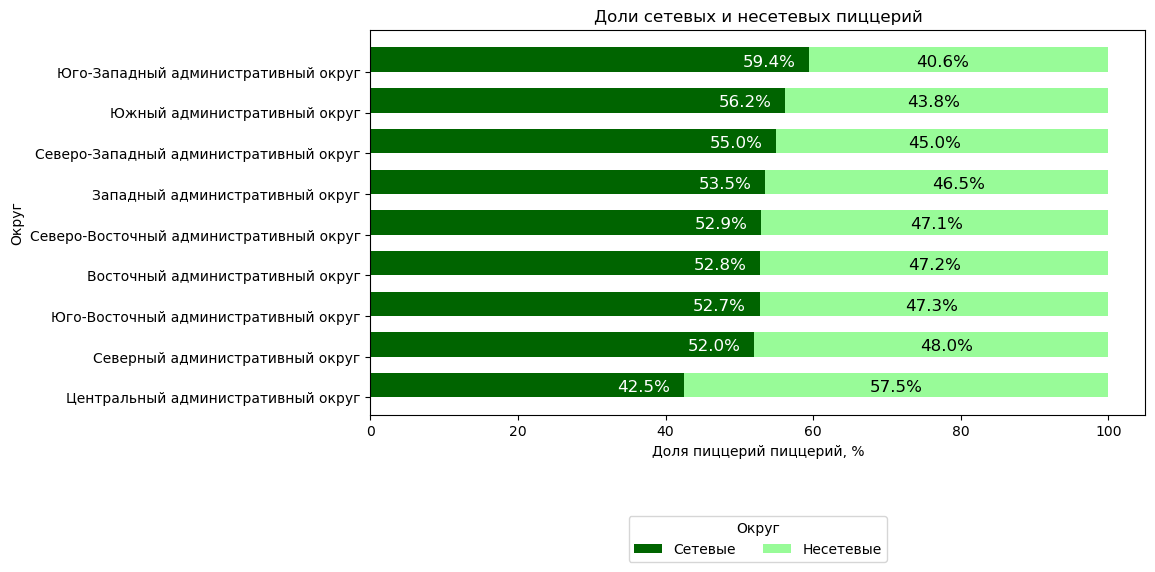

In [129]:
# Построение графика
sorted_data_district = pizzerias_merge_network.sort_values(by='share_chain')

district = sorted_data_district['district']
shares_chain = sorted_data_district['share_chain']
shares_not_chain = sorted_data_district['share_not_chain']

fig, ax = plt.subplots(figsize=(10, 5))


## Накопительный график
ax.barh(district, shares_chain, align='edge', height=0.6, label='Сетевые', color='darkgreen')
ax.barh(district, shares_not_chain, left=shares_chain, align='edge', height=0.6, label='Несетевые', color='palegreen')

# Добавление подписей данных
for i, v in enumerate(shares_chain):
    mid_point = v-9
    ax.text(mid_point, i + 0.25, f"{v:.1f}%", ha="left", va="center", color='white', fontsize=12)
    
for i, v in enumerate(shares_not_chain):
    total_width = shares_chain[i] + shares_not_chain[i]
    text_x = shares_chain[i] + (total_width - shares_chain[i]) / 2
    ax.text(text_x, i + 0.25, f"{v:.1f}%", ha="center", va="center", color='black', fontsize=12)
    
# Настройки осей и заголовков
plt.xlabel('Доля пиццерий пиццерий, %')
plt.ylabel('Округ')
plt.title('Доли сетевых и несетевых пиццерий')
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.4), title='Округ')
plt.show()

Исследование показало, что наибольшее количество сетевых пиццерий открыто в округах `ЮЗАО`, `ЮАО` и `СЗАО`. Такая тенденция объясняется следующими факторами:

- легкость открытия сетевых заведений: уже налаженные процессы, возможность аренды проходимых мест и известные бренды привлекают инвесторов;
- отличительные черты несетевых пиццерий: они обычно маленькие, этнические, стремятся подчеркнуть индивидуальность и уникальность своей кухни;
- ориентация на целевую аудиторию: сетевые пиццерии рассчитаны на широкую публику, тогда как несетевые заведения выбирают специализированные сегменты рынка.

Факторы, поддерживающие открытие сетевых пиццерий в указанных округах:

- высокая плотность населения в ЮЗАО, ЮАО и СЗАО обеспечивает достаточное количество потенциальных клиентов;
- хорошо развитая транспортная инфраструктура (метро, магистрали) улучшает логистику поставок и удобство передвижения клиентов.

Таким образом, регионы с хорошей транспортной доступностью и высокой концентрацией населения оказываются привлекательными для бизнеса, особенно для открывающихся сетевых пиццерий.

## Промежуточные выводы по исследовательскому анализу данных заведений московского региона


**Общая картина рынка:**
- всего выделено восемь категорий заведений, среди которых лидерство принадлежит кафе, ресторанам и кофейням;
- Центральный административный округ (ЦАО) лидирует по количеству заведений (более 2000), что свидетельствует о высокой плотности и конкурентности рынка.

**Характеристика заведений:**
- сети широко представлены среди булочных, кофейнь и пиццерий, что связано с возможностью быстрого масштабирования бизнеса через франшизу;
- столовые и пабы чаще всего функционируют как несетевые заведения, сосредотачиваясь на обслуживании постоянных клиентов.

**Количество посадочных мест:**
- медианные и средние значения редко превышают 200 мест, что указывает на умеренно малые размеры большинства заведений.

**Рейтинги заведений:**
- лучшие рейтинги получены у ресторанов, пабов и пиццерий, что связывают с приятным досугом и атмосферой заведения.

**Лидирующие сетевые заведения:**

- среди лидеров по популярности — сетевые кофейни «Шоколадница» и пиццерии «Додо» и «Доминос». Хотя менее известные заведения («Буханка», «Кулинарная лавка братьев Караваевых») порой превосходят их по оценкам.

**Стоимость кофе:**
- установлена обратная зависимость: профильные заведения (кафе, кофейни) устанавливают более низкие цены на кофе, поскольку это их ключевой продукт, нуждающийся в продуманном подходе к ценообразованию.

**Потенциальные рынки пиццерий:**
- пиццерии составляют небольшую долю общего рынка (менее 10%) и имеют потенциал для роста, особенно в зонах с высокой плотностью населения (ЮЗАО, ЮАО, СЗАО);
- типовая пиццерия имеет следующие характеристики:
    - 90-95 посадочными местами;
    - средним чеком до 1000 рублей;
    - возможность открытия как отдельной единицы, так и в рамках франшизы.
Предварительные бизнес-рекомендации:

- при выборе формата заведения учитывать локализацию и профиль деятельности;
- обращать внимание на популярность сетевых брендов и их конкурентоспособность;
- применять эффективные стратегии ценовой политики, особенно для профильных продуктов;
- рассмотреть возможность открытия пиццерии в популярном районе с учётом текущих тенденций и потенциала рынка.

Представленные данные и анализ позволят грамотно спланировать деятельность заведения общественного питания в условиях московского рынка.

##  Итоговый вывод и рекомендации


Нам было предоставлено 2 датасета с информацией о количественные и качественные показатели данных заведений общественного питания города Москва.

Наша цель заключалась непосредственно в оценке сферы общественного питания в городе Москва и разработка рекомендаций о возможности открытия заведения общественного питания.


**Обзор проделанной работы:**

Был проведен комплексный анализ данных о сфере общественного питания в Москве. Цель состояла в оценке текущего состояния рынка и выработке рекомендаций для запуска нового заведения.

Основными этапами исследования были:

- ознакомление с данными из двух датасетов: rest_info и rest_price;
- объединение данных в единый датасет rest и проведение предобработки (исправление типов данных, удаление дубликатов, обработка пропусков);
- глубинный анализ влияния различных факторов на успех заведения.

**Главные выводы по представленному проекту:**

- концентрация заведений: в `ЦАО` насчитывается `более 2000 заведений`, что вдвое превосходит другие округа. Это говорит с одной стороны о высокой популярности округа для заведений общественного питания, но и о наличии высокой конкуренции;

- наиболее распространенные типы заведений: `кафе, рестораны и кофейни`;
- изучение формата заведения позволило определить, что лидирующие позиции занимают сетевые заведения среди `булочных, кофейнь и пиццери`й, что объясняется простотой внедрения франшиз, а бары и пабы сохраняют независимость, уделяя внимание уникальной атмосфере и индивидуальным подходам;
- анализ рейтингов заведений выявил, что высокие рейтинги характерны для ресторанов, пабов и пиццерий, обеспечивающих приятные впечатления и качественное питание, а заведения быстрого питания уступают в сервисе и атмосфере, что отрицательно сказывается на воспринимаемой ценности;
- определение топ-15 заведений: лидерство удерживают сетевые марки `(«Шоколадница», «Додо», «Доминос»)`. Однако высшими рейтингами обладают менее известные заведения `(«Буханка», «Кулинарная лавка братьев Караваевых»)`;
- цены и расположение: средний чек заведения прямо зависит от статуса заведения и его расположения, так как чем статуснее заведение и лучше его локация, тем с большей вероятностью чек будет выше, так как стоимость аренды, дополнительные отчисления. логистика и так далее;;
- для кофеен характерно установление низких цен на кофе, так как напиток является одним из главных продуктов, требующих эффективной ценовой политики.
- потенциал пиццерий: пиццерии занимают небольшую долю рынка `(менее 10%)`, но пользуются спросом у широкой аудитории, возможна организация пиццерии с небольшим количеством посадочных мест `(примерно 90-95)` и средним чеком `до 1000 рублей`.




**Общие рекомендации и выводы по результатам анализа:**


- определение целей и целевой аудитории: четко сформулировать миссию заведения, выбрав целевую группу клиентов и подходящий формат работы;
- место расположения: рассмотреть открытие заведения в ЦАО и САО, где высока активность посетителей, но велика конкуренция, поэтому альтернативой может стать `СЗАО`, где меньше конкурентов, ниже арендные ставки, но растет население и развивается инфраструктура;
- франшиза или собственное дело: франшиза снижает стартовые издержки и ускоряет запуск бизнеса, но подразумевает ограничения свободы действий. Самостоятельное предприятие требует большего вложения ресурсов, но открывает простор для креатива и экспериментов;
- ценовая политика: формирование ценовой политики необходимо основывать на:
    - масштабах бизнеса;
    - целевой аудитории;
    - типе заведения;
    - расположении;
- маркетинг и продвижение:
    - регулярно отслеживать предпочтения клиентов и адаптировать предложение;
    - использовать современные инструменты рекламы и коммуникации для привлечения клиентов.

Открытие пиццерии может стать достаточно перспективным проектом, так как пиццерии несмотря на их достаточно небольшую долю в общем объеме заведений обладают высокой популярностью у населения. Пиццерия достаточно универсальна, ее можно открыть и в спальном. в студенческом и бизнес районе. Стоит оперироваться также на то, что не требуется большого числа посадочных мест, а средний чек должен составлять `от 600-1000 рублей`, что позволит сделать продукцию доступной для большой целевой аудитории. Стоит также рассмотреть открытие сетевой пиццерии в различных округах тем самым получим больший клиентопоток и так далее.
В заключение, внедрение рекомендаций поможет владельцу заведения добиться устойчивого роста и устойчивости на насыщенном московском рынке общественного питания.
